#Este codigo fue hecho en Colab de Google, por lo que tiene algunas librerias exploratoria de la data propia de google.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
from google.colab.data_table import DataTable

data=pd.read_csv('/content/drive/MyDrive/Pruebas para DS/FixPartnersConsulting/Preguntas/Datos prueba Fix.csv',sep=';')
head=pd.read_excel('/content/drive/MyDrive/Pruebas para DS/FixPartnersConsulting/Preguntas/Diccionario prueba FIX.xlsx')
head['Pregunta']=head.Pregunta.str.replace('P0','P')
data.rename(columns={row[0]:row[1] for index, row in head.iterrows()},inplace=True)
DataTable(data,max_columns=(data.shape[1]+1))

Output hidden; open in https://colab.research.google.com to view.

In [5]:
DataTable(data.describe(include='all'))

,Genero,Edad,Nacionalidad,Residencia,Sostenedor economico,Ingreso,Frecuencia de compra,Horario favorito,la tienda ofrece una buena calidad de productos,la tienda ofrece precios atractivos,la tienda ofrece una relación precio - calidad superior a la competencia,la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,la tienda cuenta con variedad de productos en tiendas,la tienda ofrece productos a la moda,la tienda ofrece promociones atractivas,Ubicación productos es buena,Disponibilidad de productos es buena,Asistencia en sala de ventas es buena,Rapidez filas cajas es buena,Promoción de productos es buena,Información de precios es buena,Limpieza tiendas es buena,Atención de cajeras es buena,Método de pago son buenos,Disponibilidad de cajas para pago es buena,Satisfacción evaluacion,Recomendación evaluacion,Todas nuestras tiendas cuentan con un mismo orden y limpieza,Todas nuestras tiendas cuentan con la misma variedad de productos,"La experiencia brindada por nuestras distintas sucursales, son similares","Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",Rapidez en establecer contacto call center,Solución del problema es correcta en servicio post venta,Amabilidad ejecutivas call center,la rapidez en brindar solución en servicio post venta,la compensación por problemas es correcta en servicio post venta
count,1998.000000,1996.000000,1993.000000,1998.000000,1998.000000,1998.000000,1994.00000,1991.000000,1995.000000,1998.000000,1998,1985.000000,1997,1991,1995.000000,1993,1995,1995,1998.000000,1994.000000,1998.000000,1998,1983.000000,1998.000000,1994.000000,1998.000000,1996.000000,1998.000000,1998.000000,1992.000000,1994.000000,1995.000000,1998.000000,1991.000000,1998.000000,1998.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,6,4,NaN,7,6,10,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,3,NaN,4,4,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,NaN,1057,1021,NaN,1196,1084,817,NaN,NaN,NaN,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.138639,3.377756,1.055193,7.508509,1.478979,2.316817,2.57322,2.581617,2.425063,7.522523,NaN,2.428715,NaN,NaN,2.523810,NaN,NaN,NaN,4.175676,4.197593,6.420921,NaN,3.930913,3.972973,3.581244,4.148148,29.397295,3.832332,23.422923,3.735944,3.571214,3.662155,3.622623,3.780512,3.610110,3.453453
std,0.352825,1.361698,0.228414,2.386046,0.499683,1.334878,1.00969,0.983402,0.541899,223.663017,NaN,0.545400,NaN,NaN,0.540078,NaN,NaN,NaN,11.132950,8.914889,111.775145,NaN,0.893845,0.861617,0.969515,0.657055,1119.056580,0.874393,894.799130,0.854893,0.974946,0.898648,0.912128,0.896415,0.932707,1.001544
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,-3.000000,1.000000,NaN,-4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.00000,2.000000,2.000000,2.000000,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,NaN,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.00000,3.000000,2.000000,3.000000,NaN,2.000000,NaN,NaN,3.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.00000,3.000000,3.000000,3.000000,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


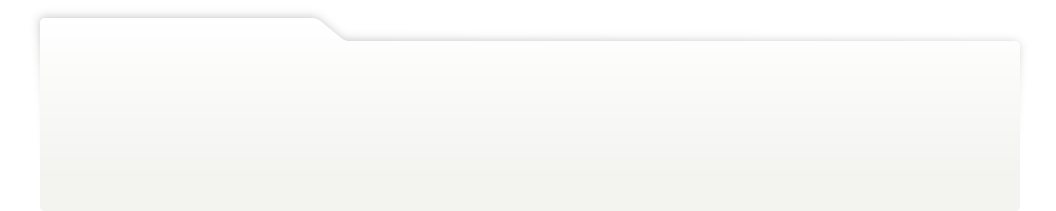
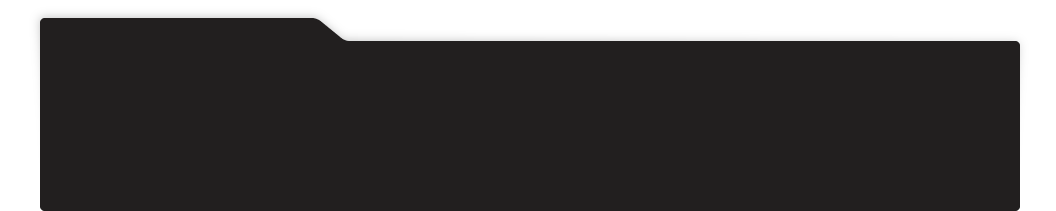
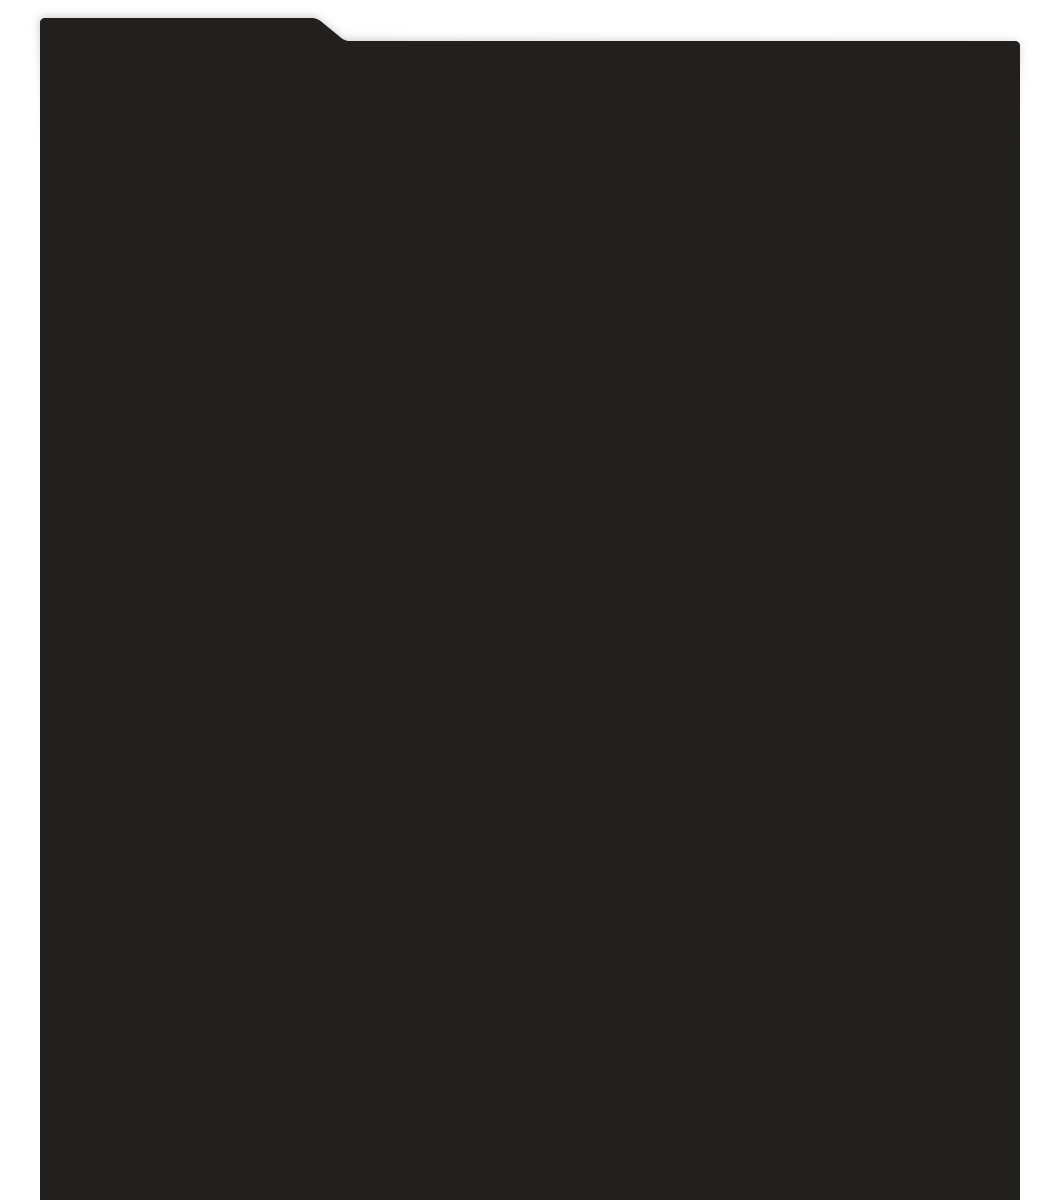
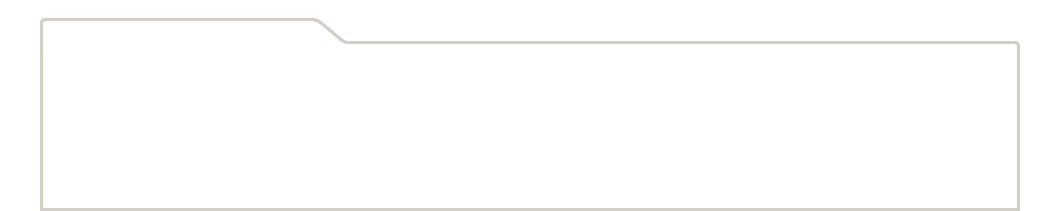
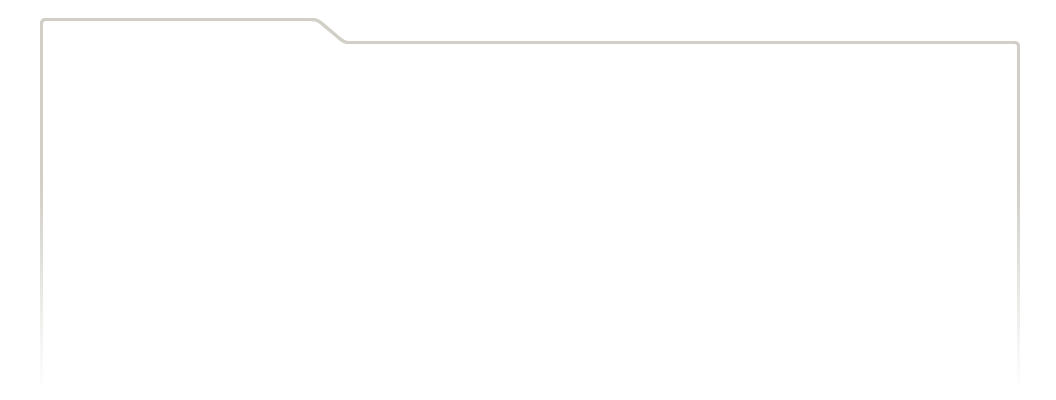
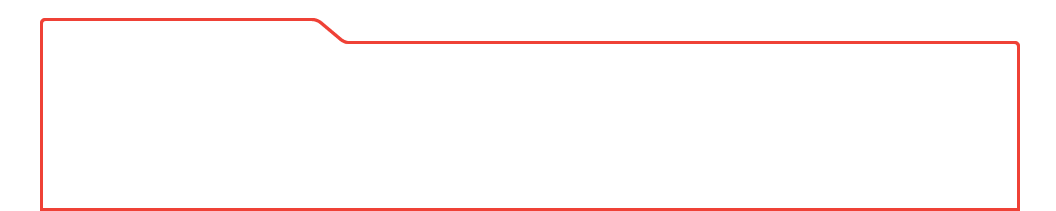
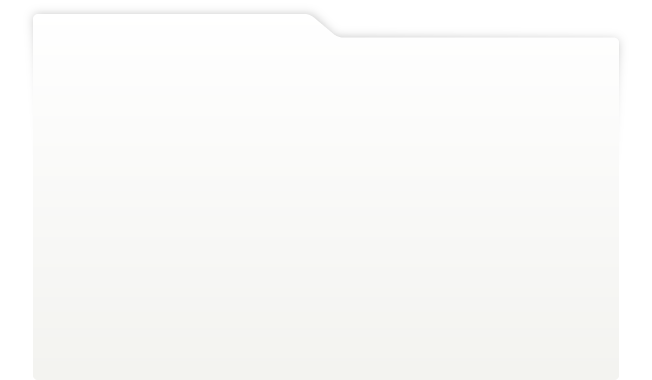
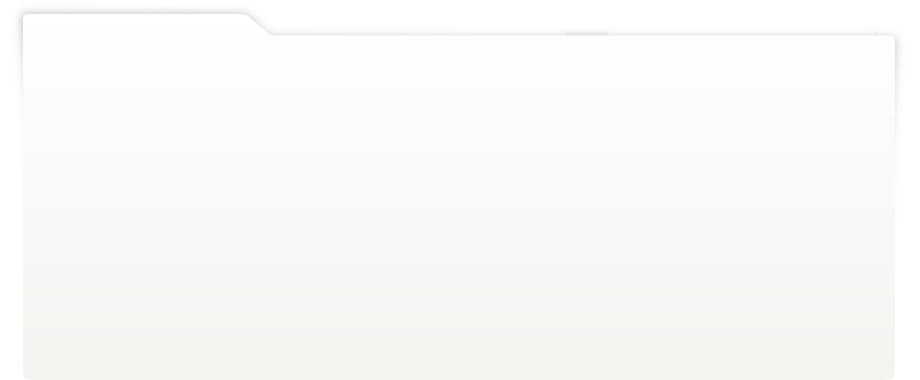
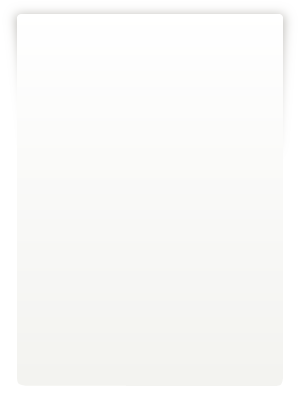
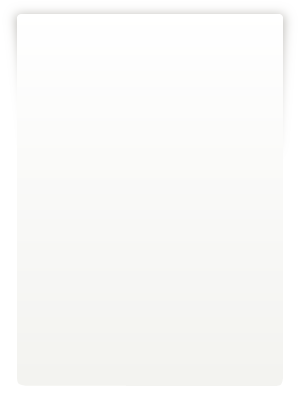
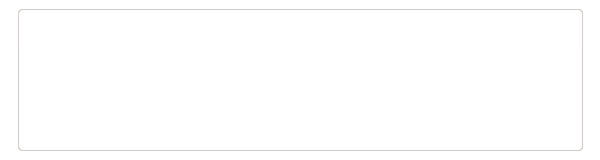
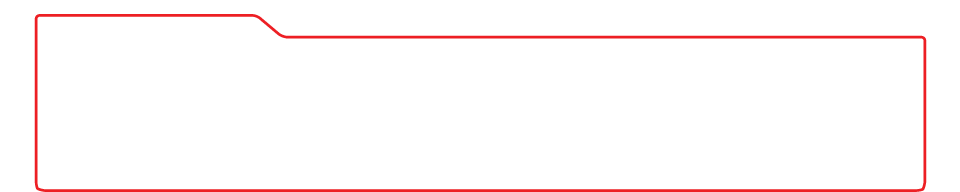
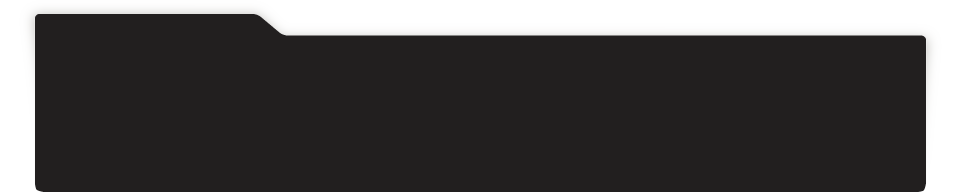
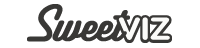
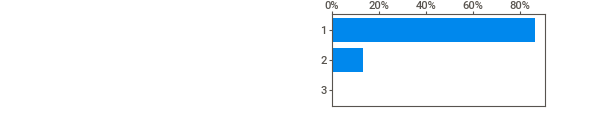
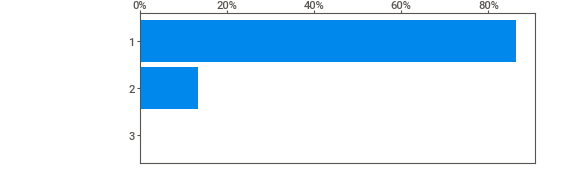
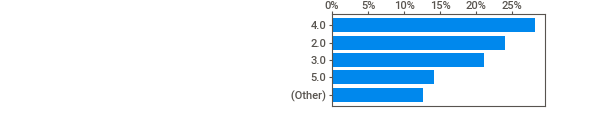
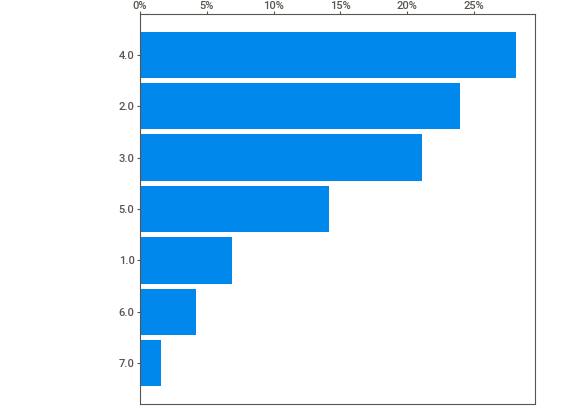
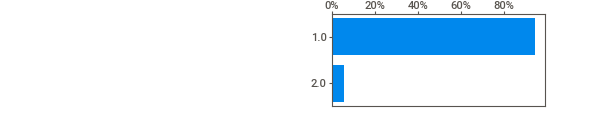
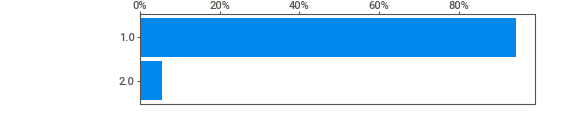
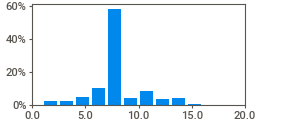
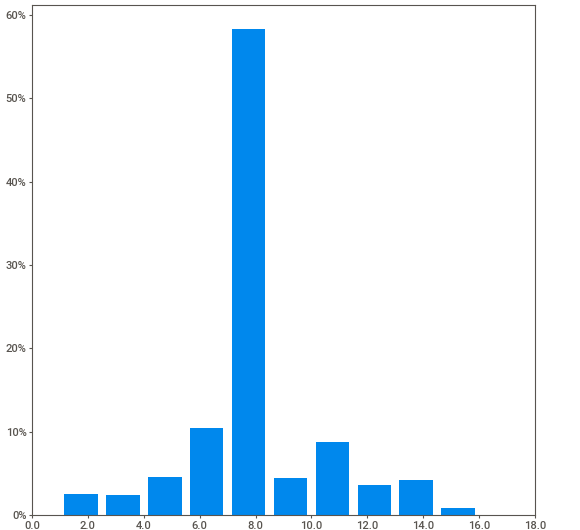
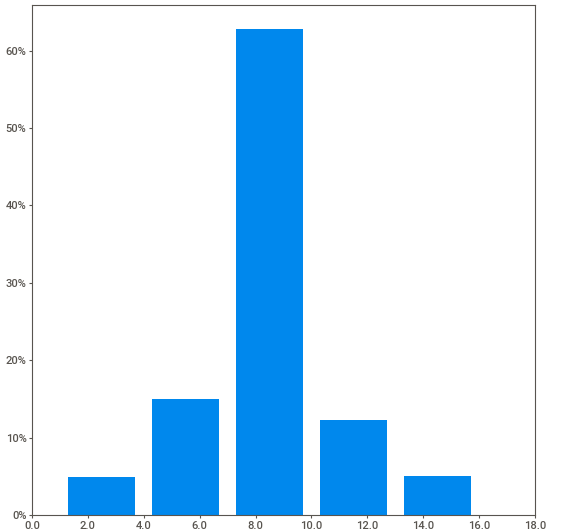
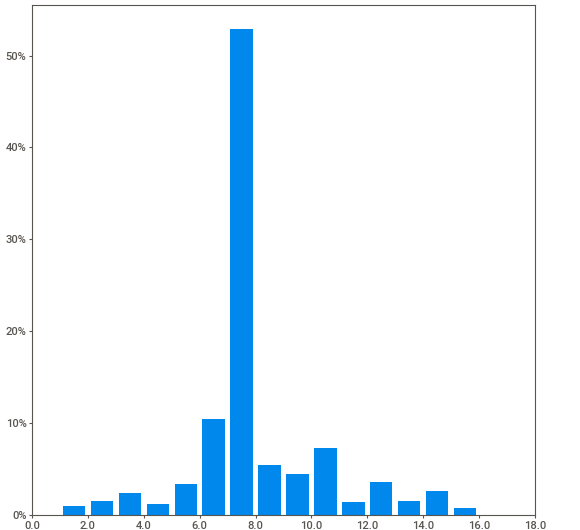
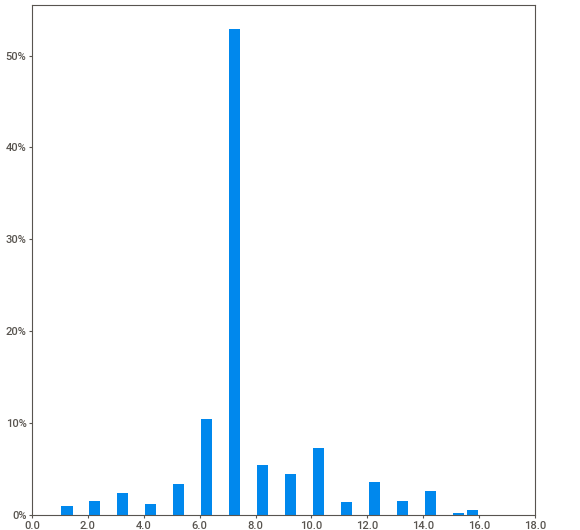
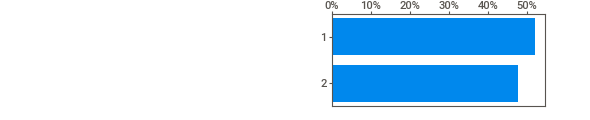
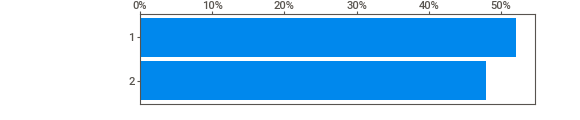
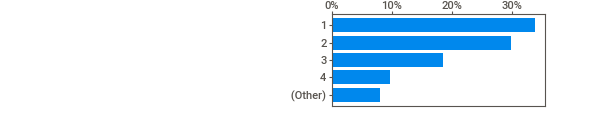
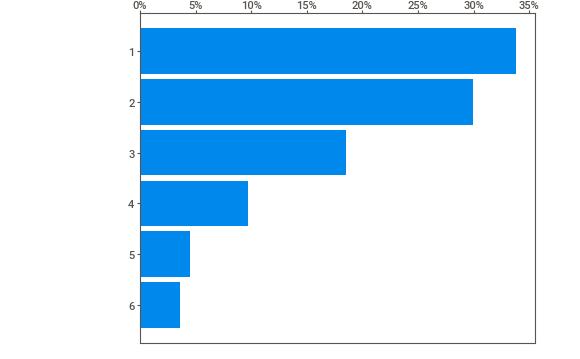
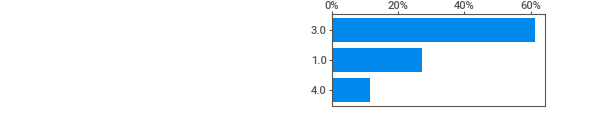
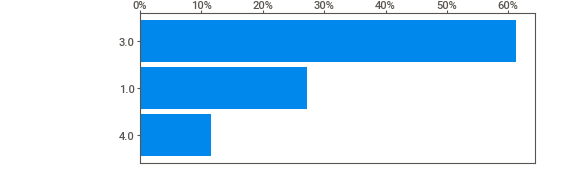
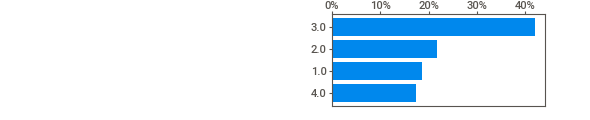
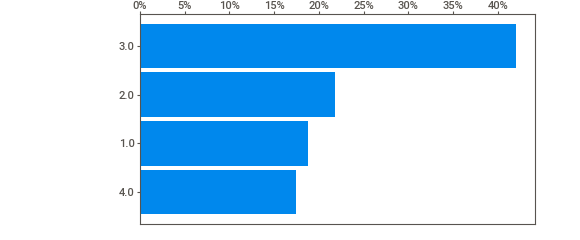
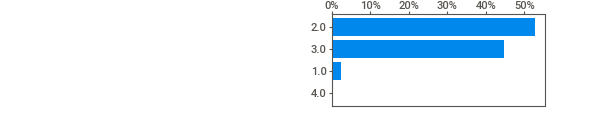
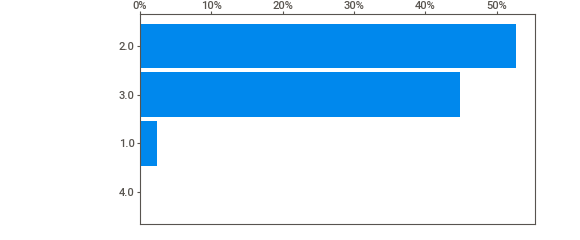
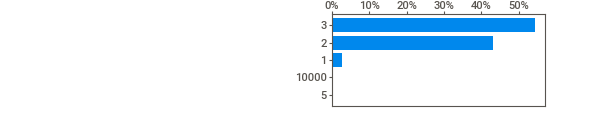
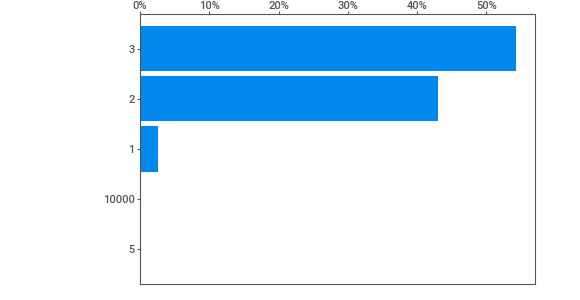
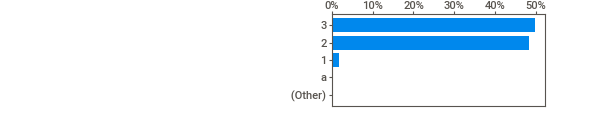
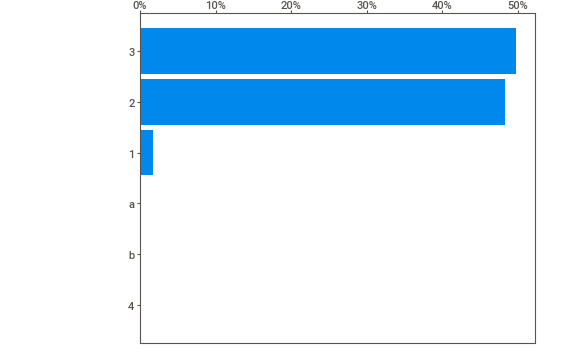
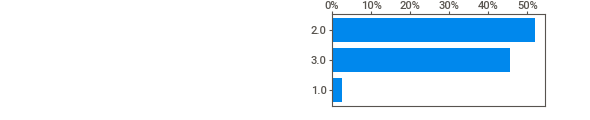
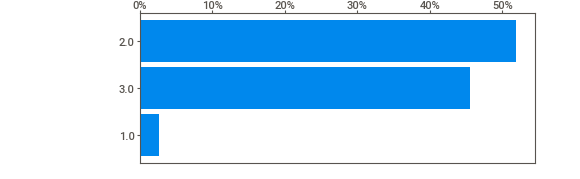
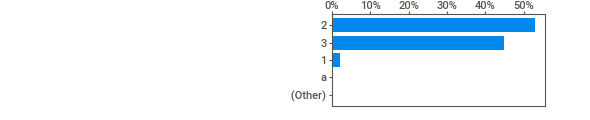
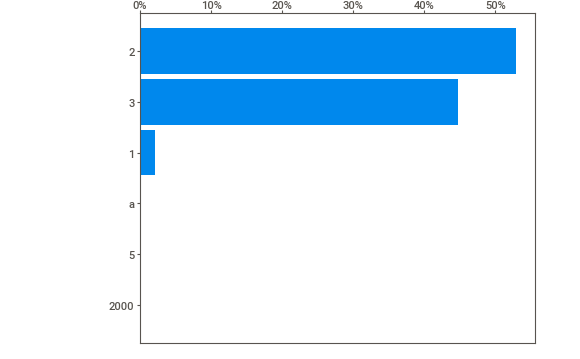
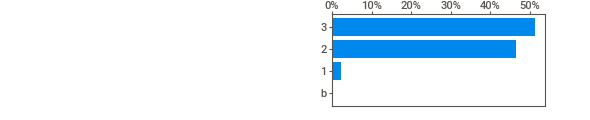
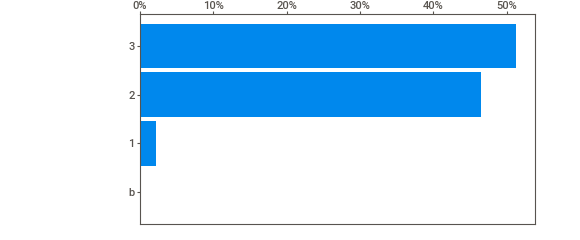
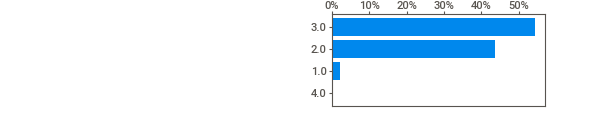
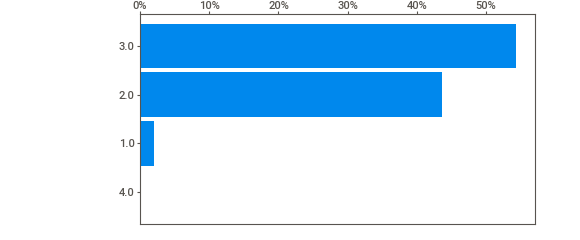
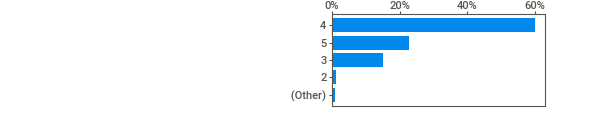
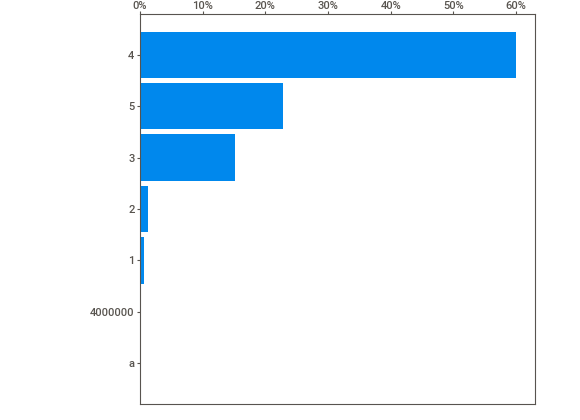
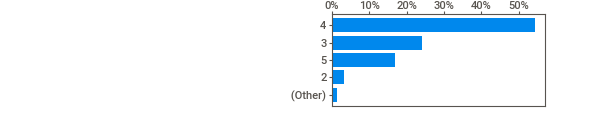
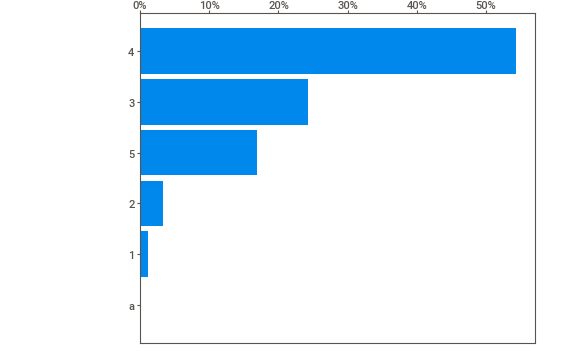
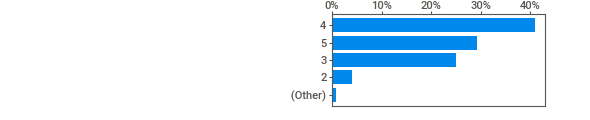
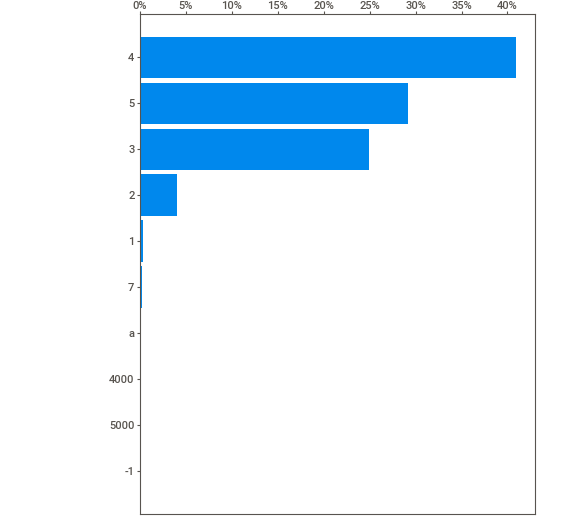
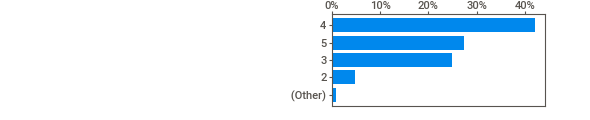
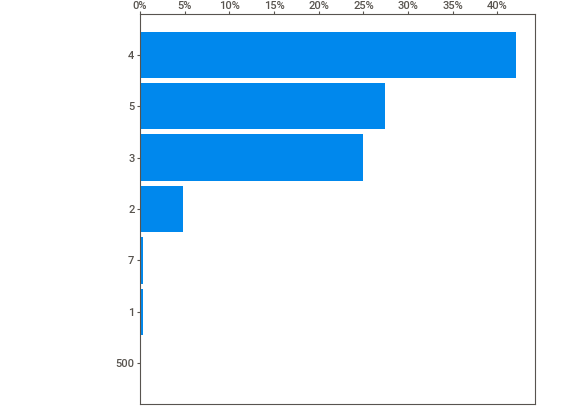
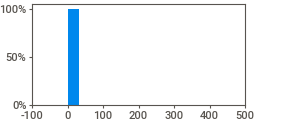
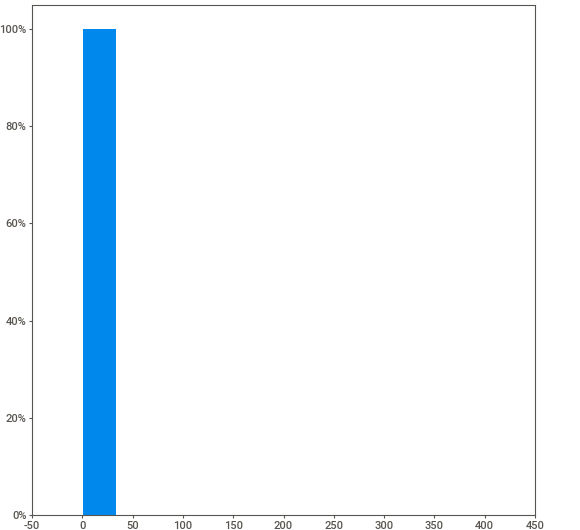
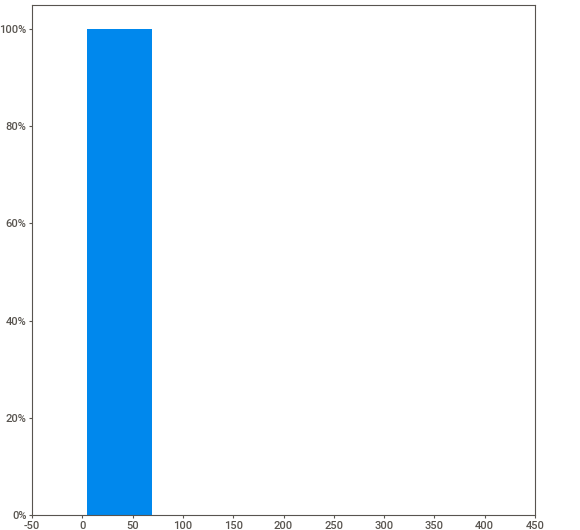
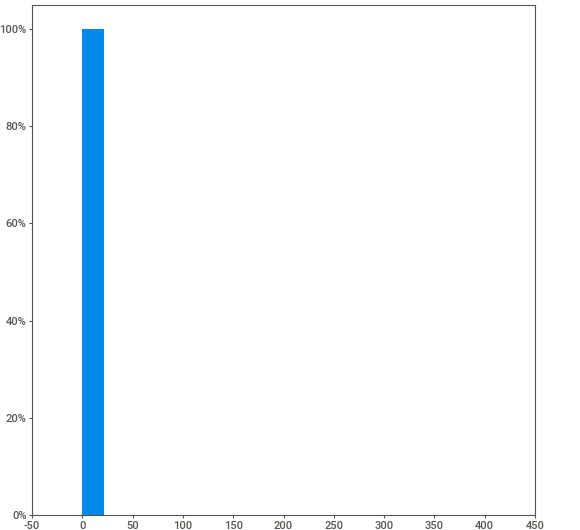
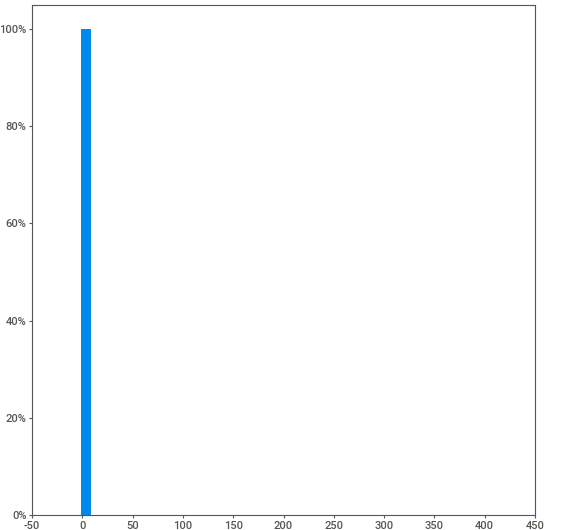
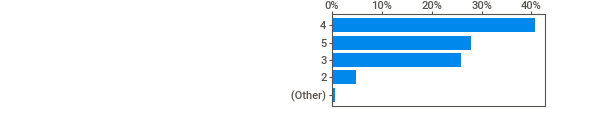
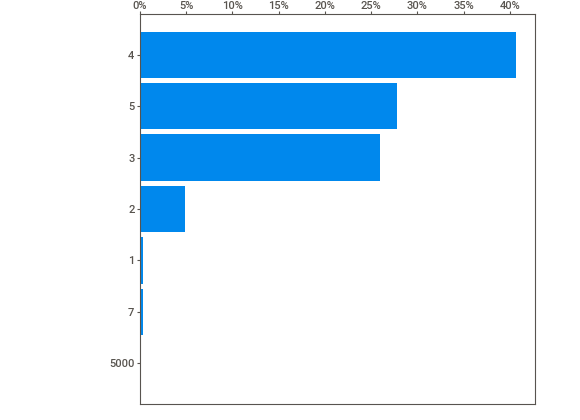
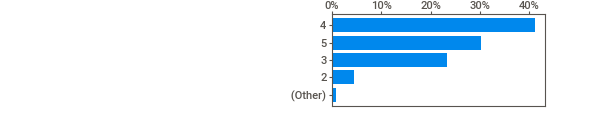
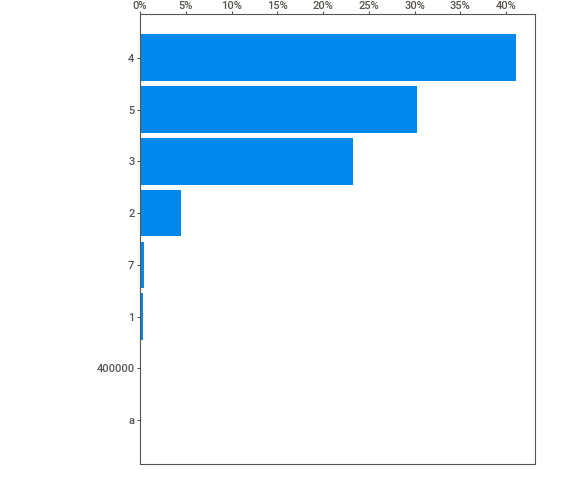
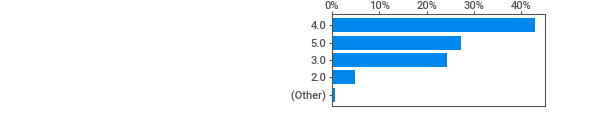
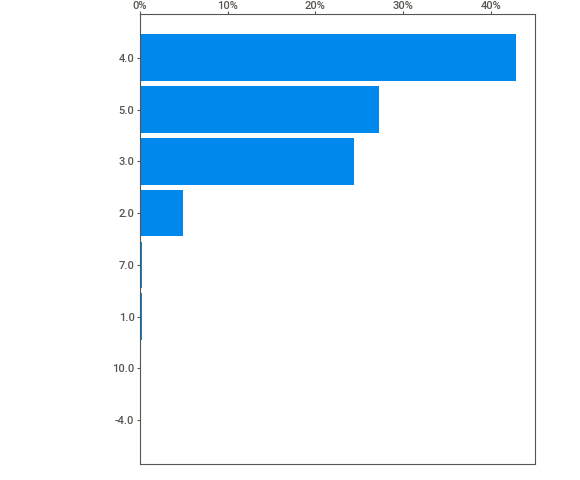
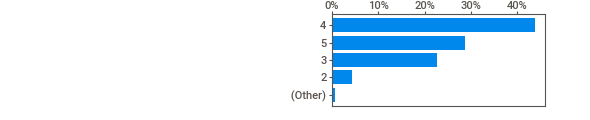
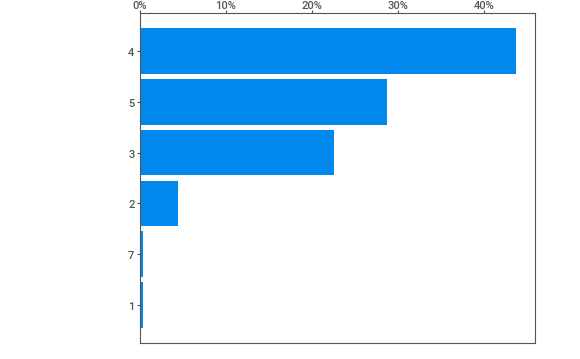
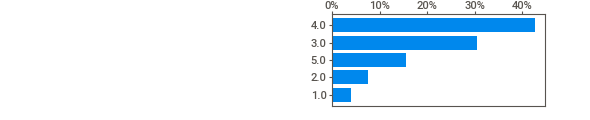
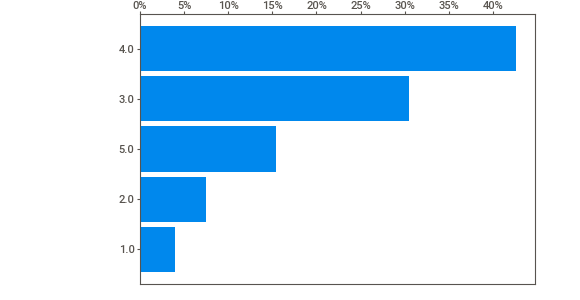
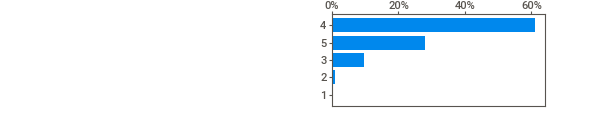
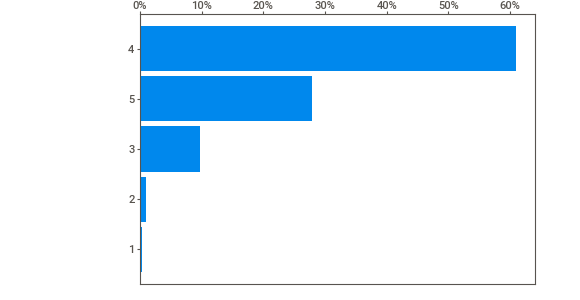
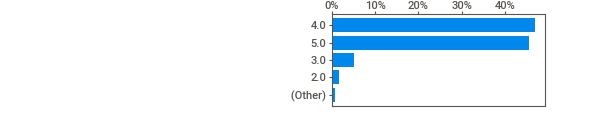
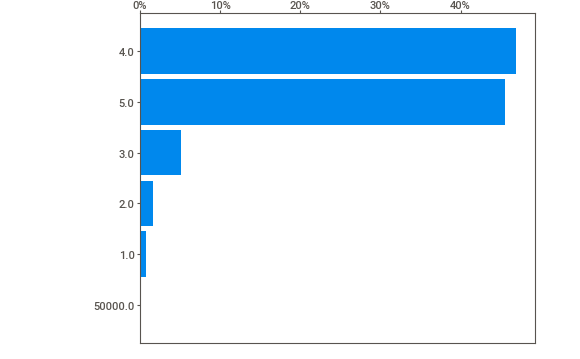
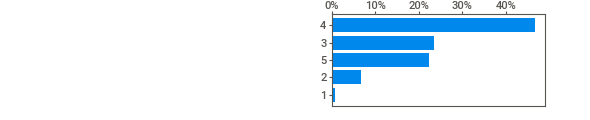
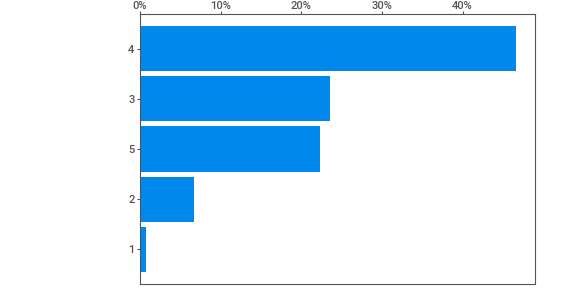
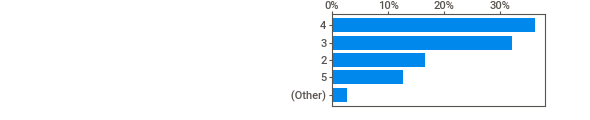
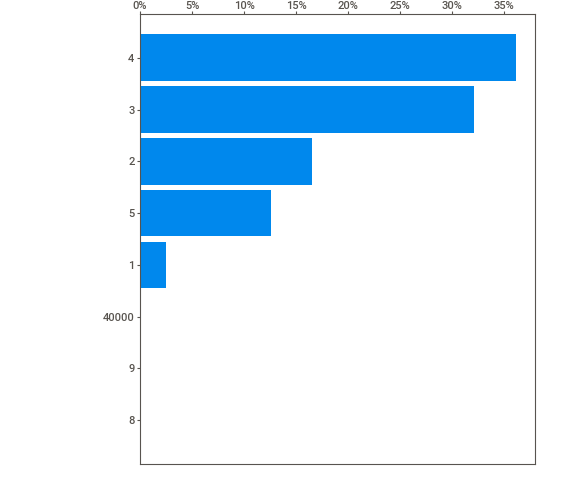
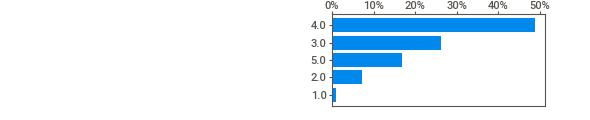
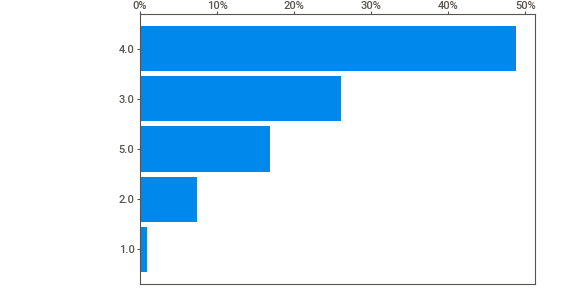
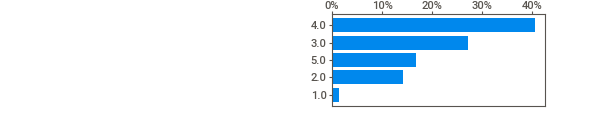
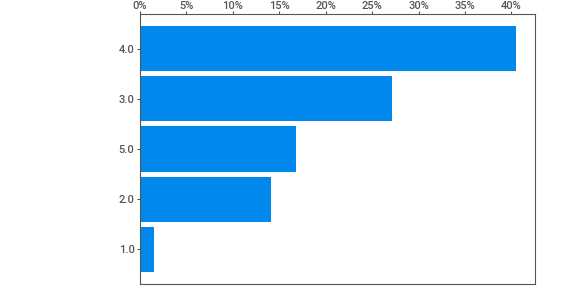
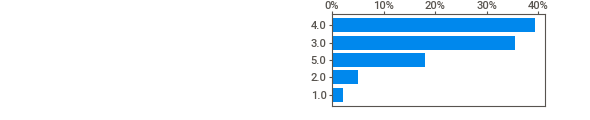
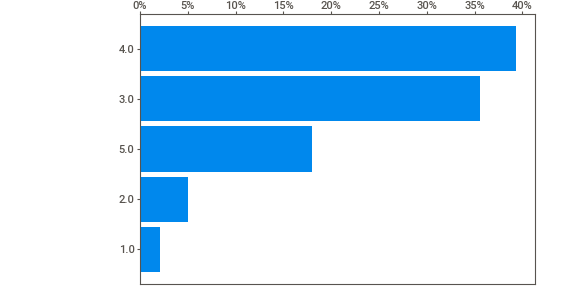
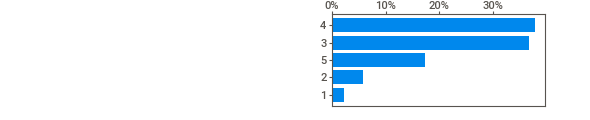
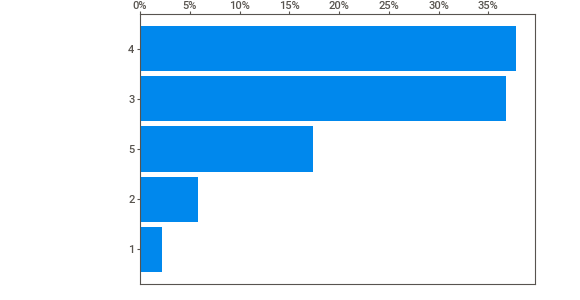
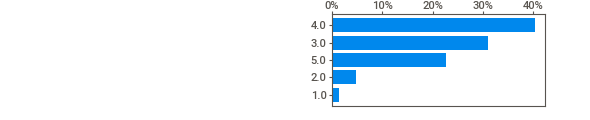
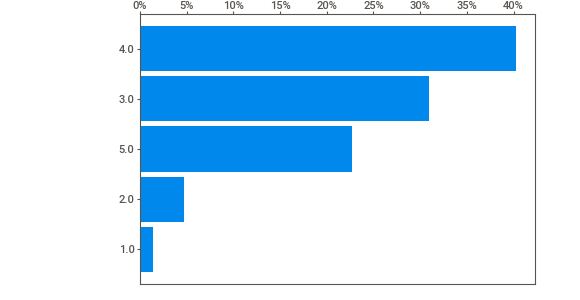
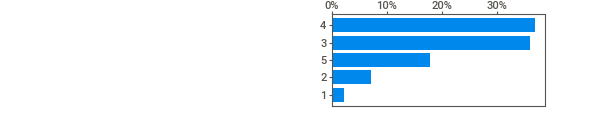
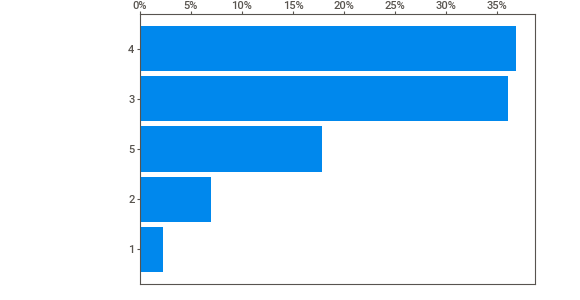
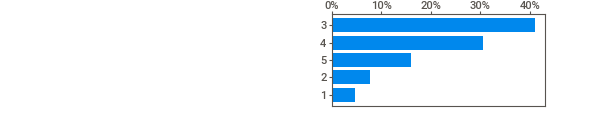
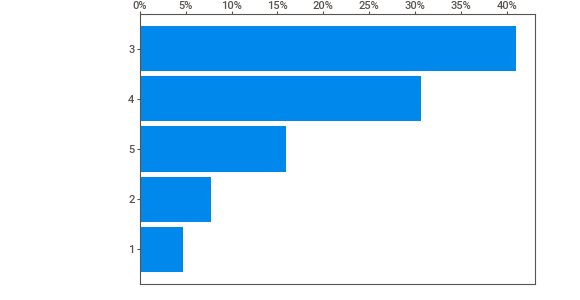
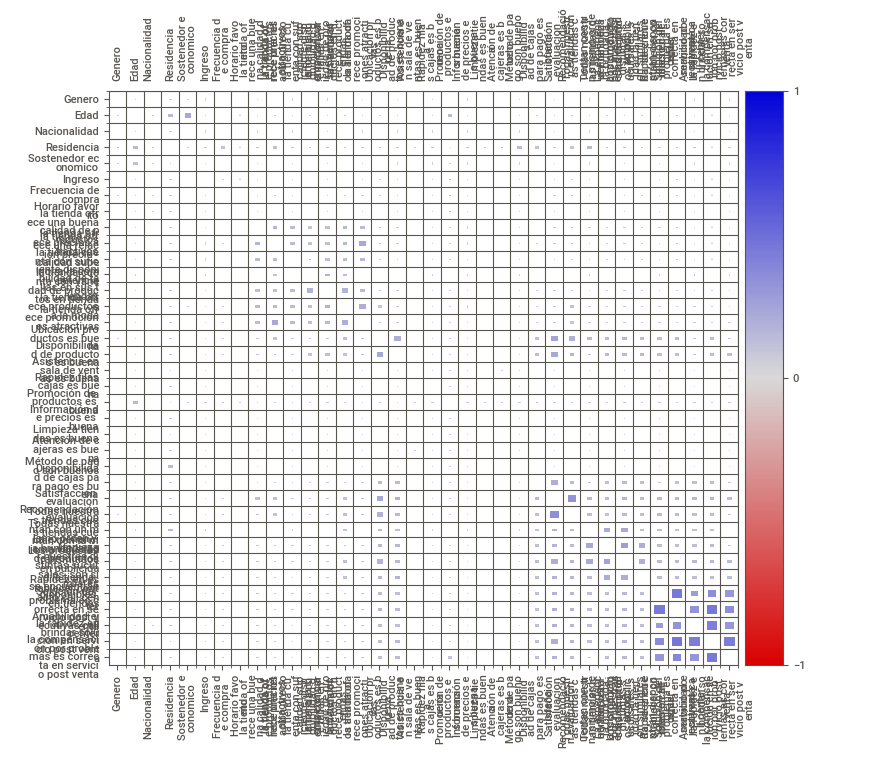
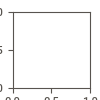

In [7]:
#Vista general de la data
import sweetviz as sw
my_report = sw.analyze(data)
my_report.show_notebook()

#Limpieza de datos
Por lo que se ve tiene valores mayores a 5, pero deberian ser datos categoricos de 1 a 5.

In [8]:
cols=head.loc[head.Pregunta.str.contains('P'),'pregunta'].tolist()
data=data.apply(lambda x: pd.to_numeric(x,errors='coerce'),axis=0)
data=data.loc[((0<data[cols])&(data[cols]<6)).all(1)].dropna().astype(int)
DataTable(data,max_columns=(data.shape[1]+1))

Output hidden; open in https://colab.research.google.com to view.

                                             |          | [  0%]   00:00 -> (? left)


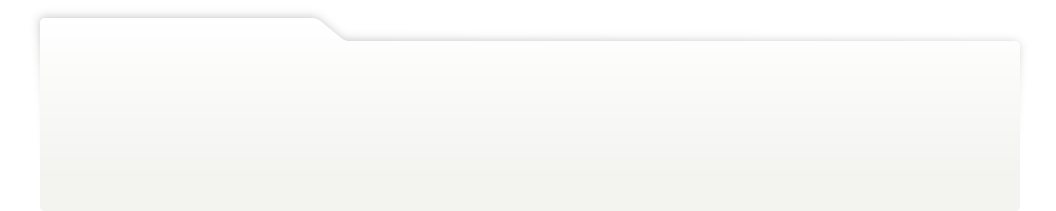
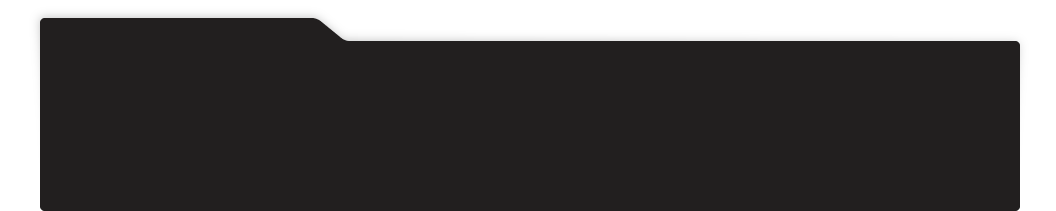
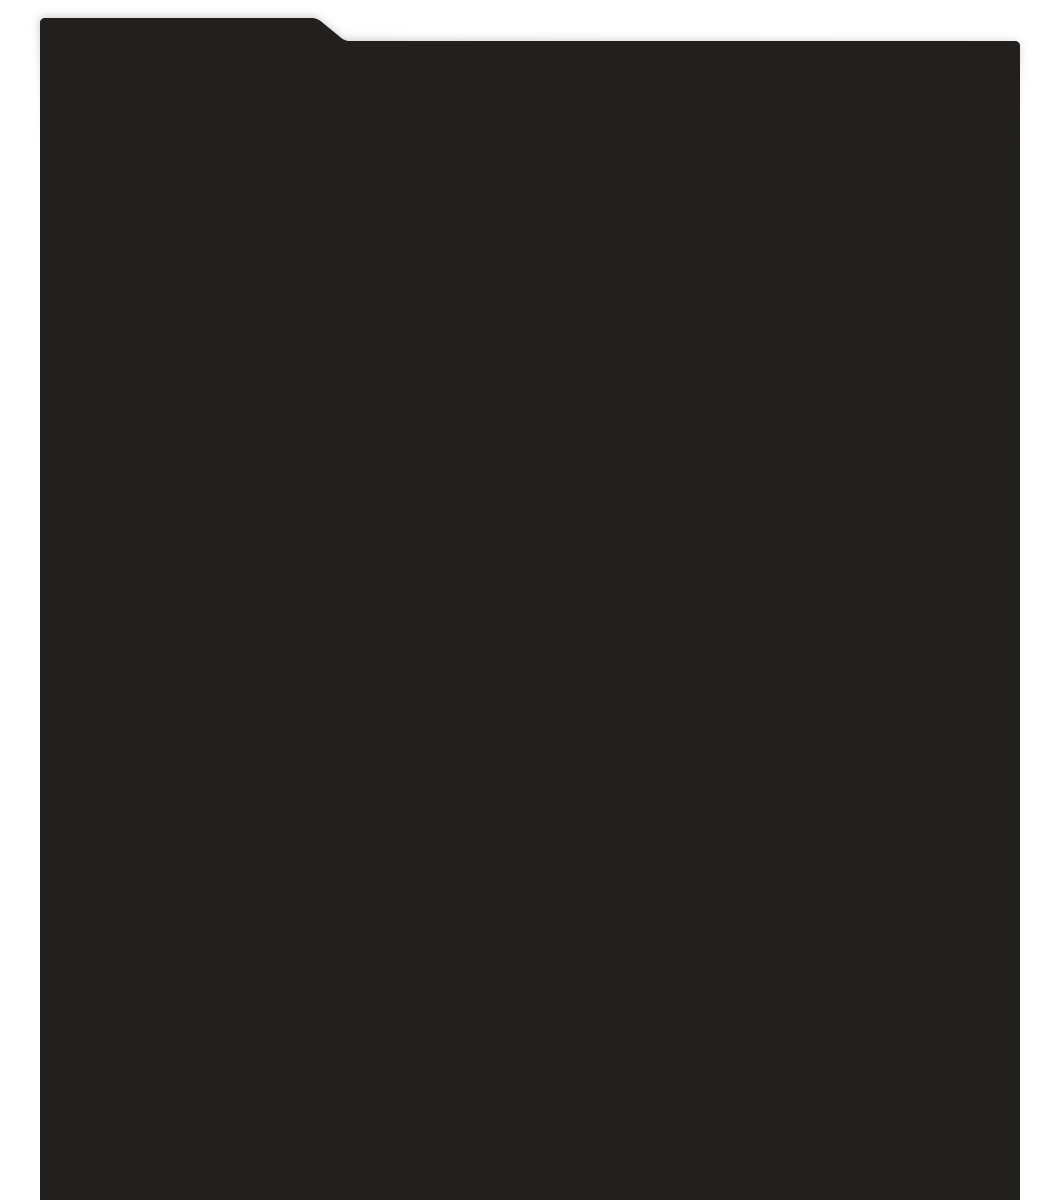
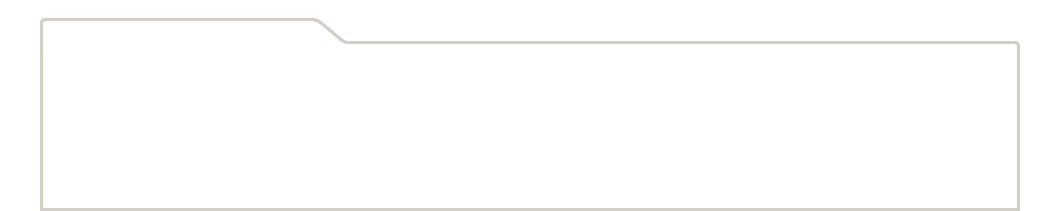
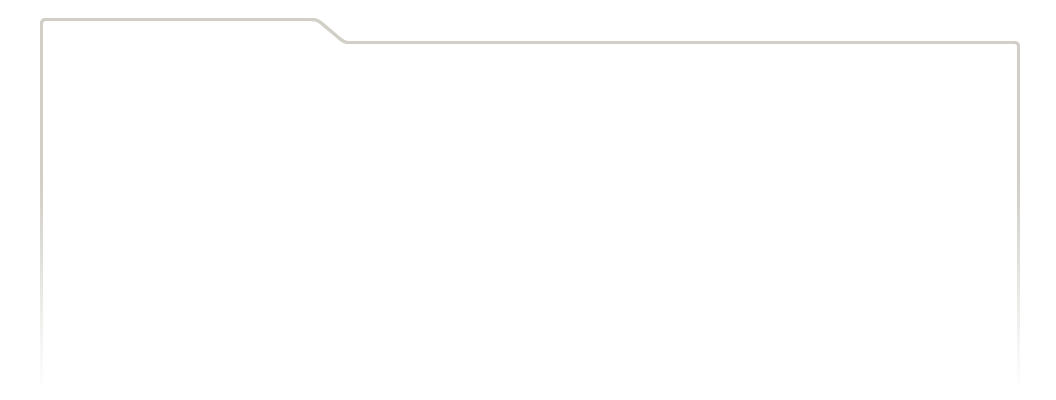
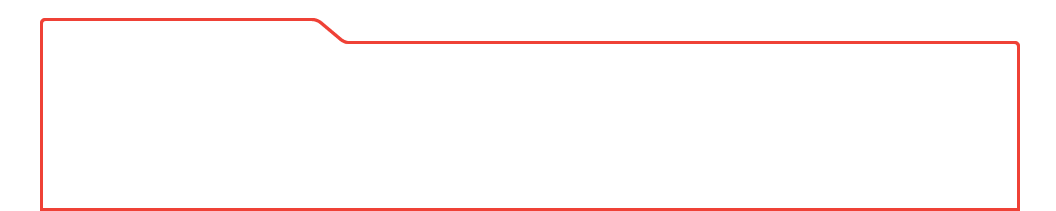
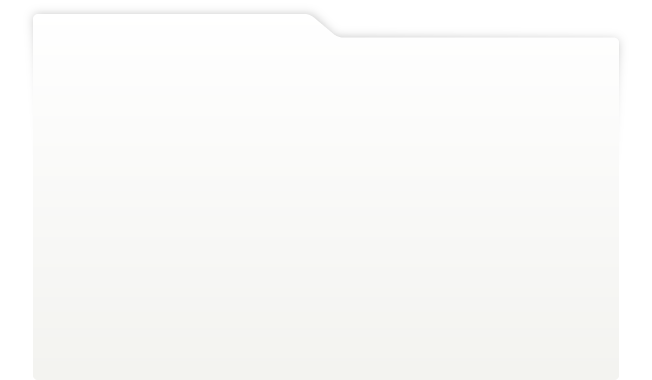
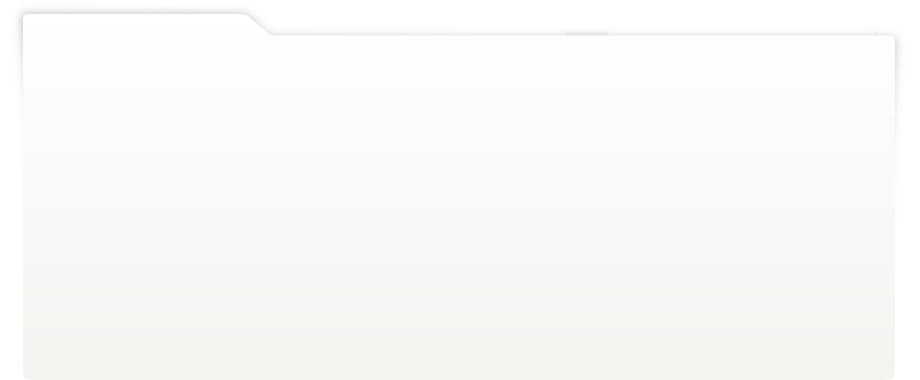
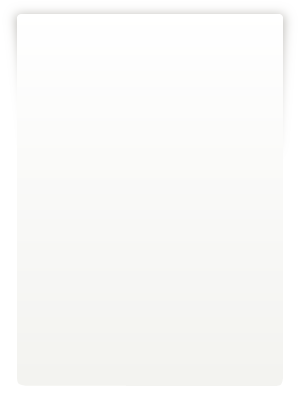
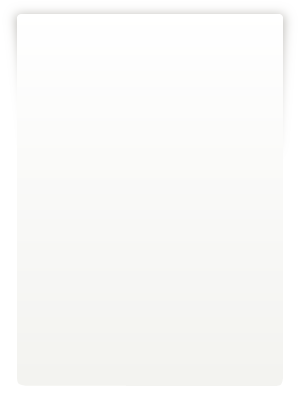
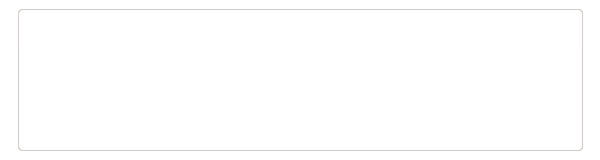
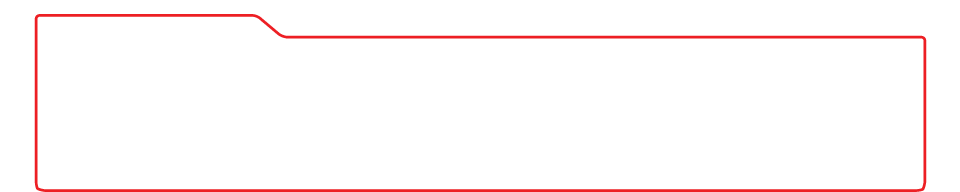
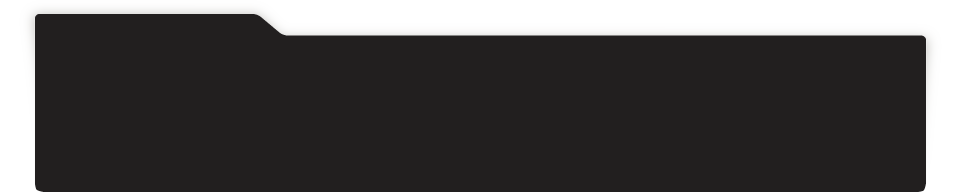
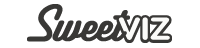
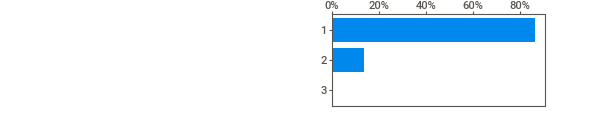
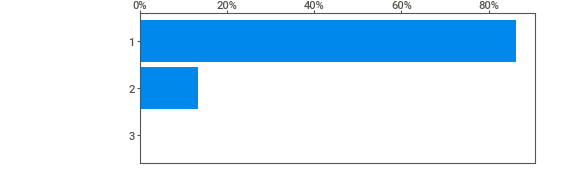
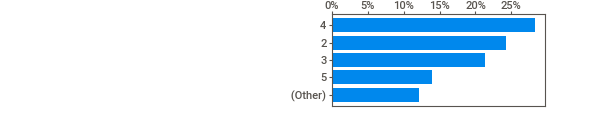
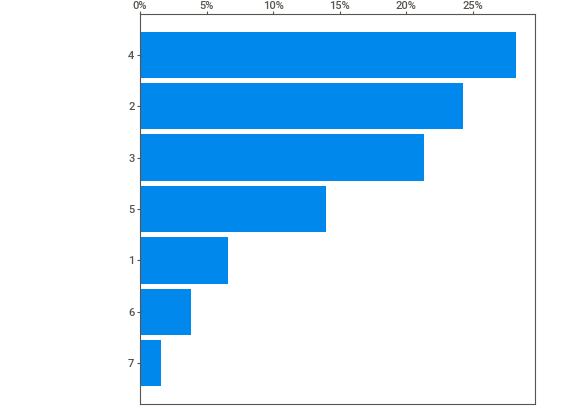
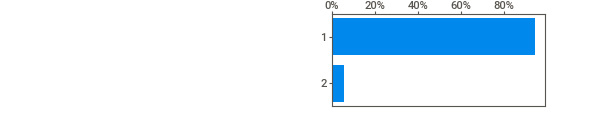
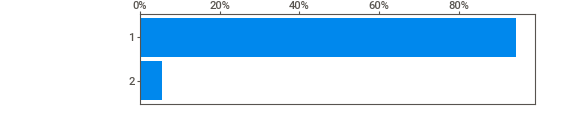
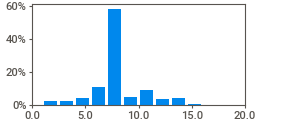
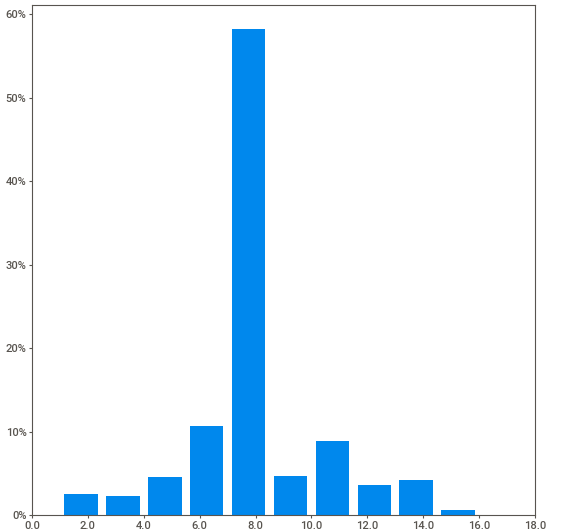
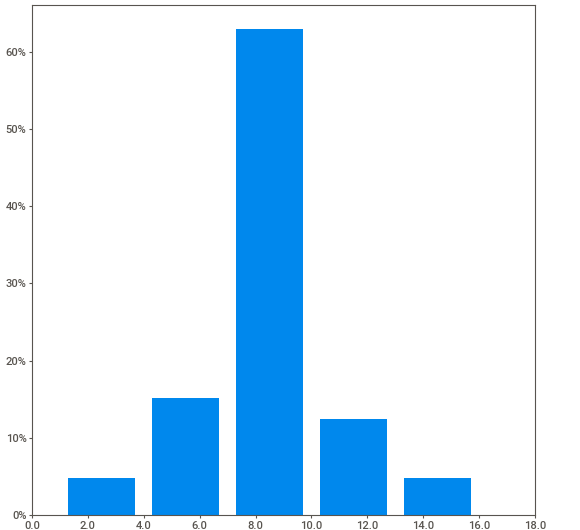
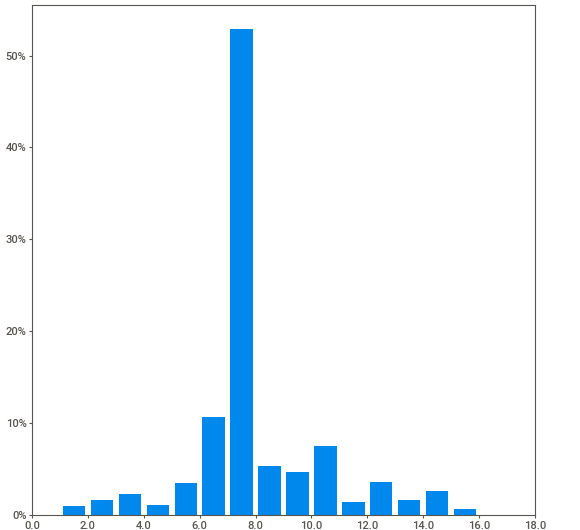
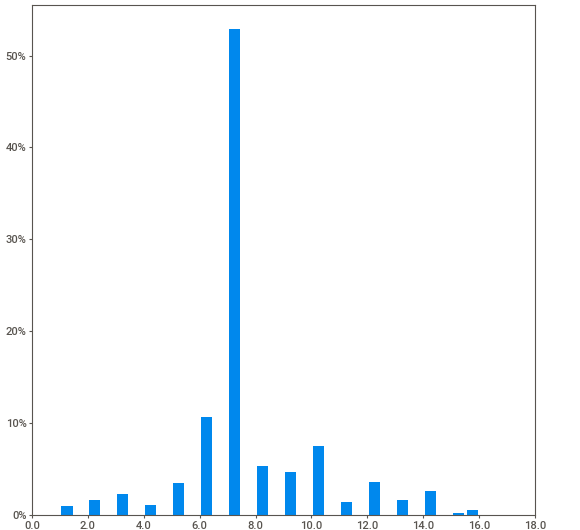
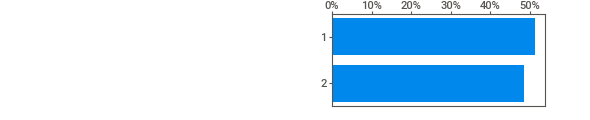
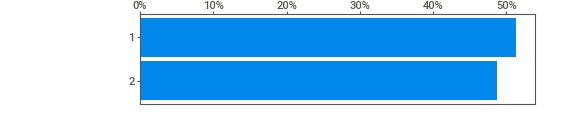
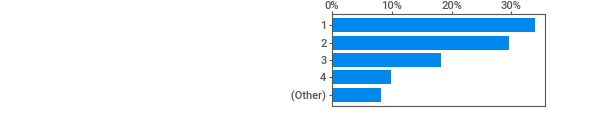
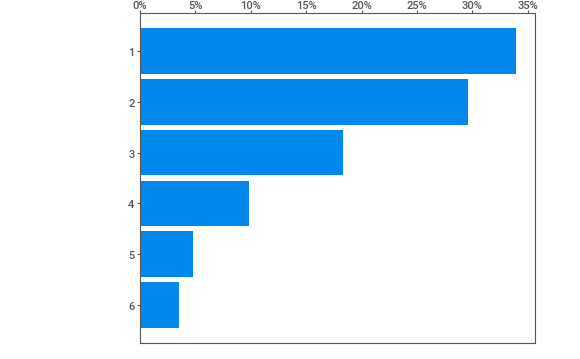
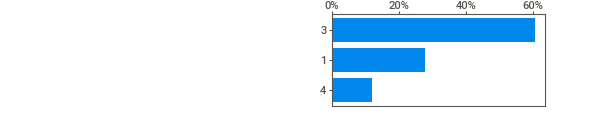
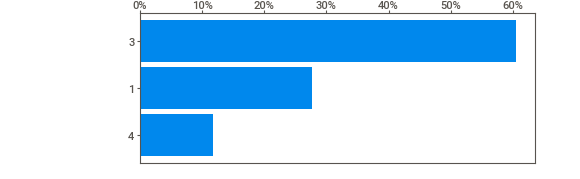
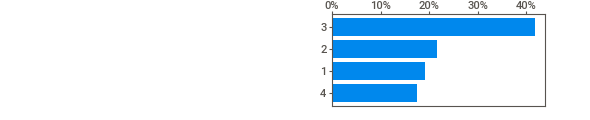
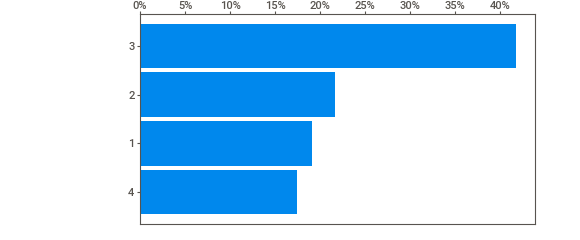
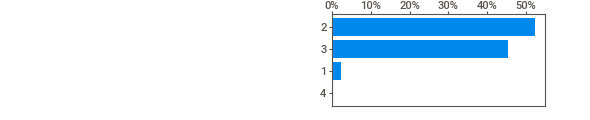
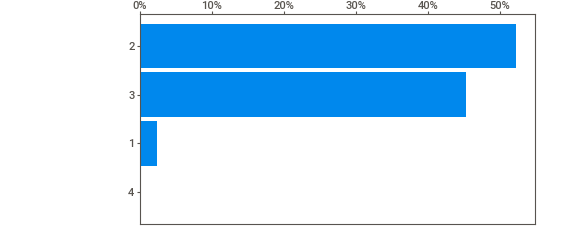
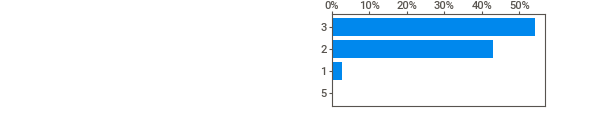
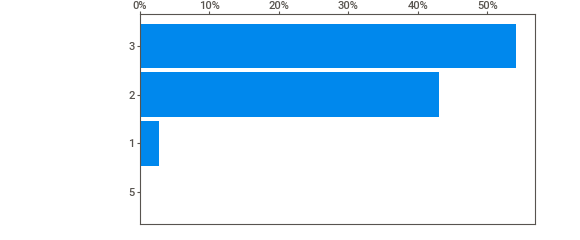
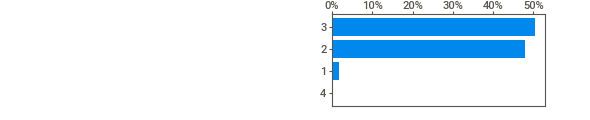
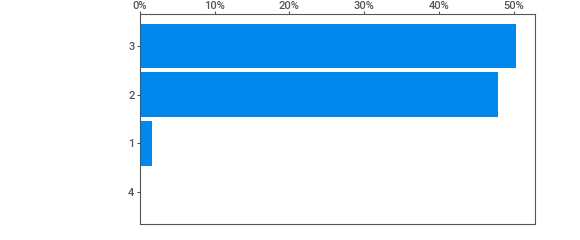
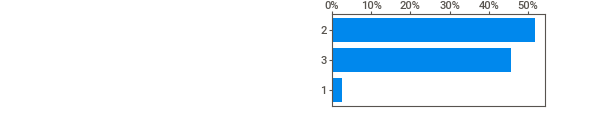
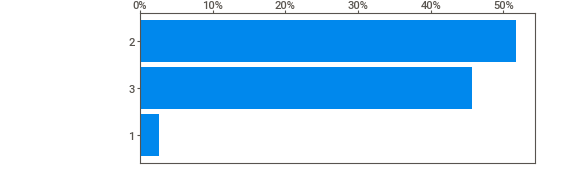
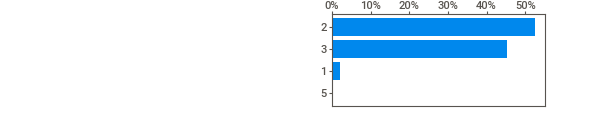
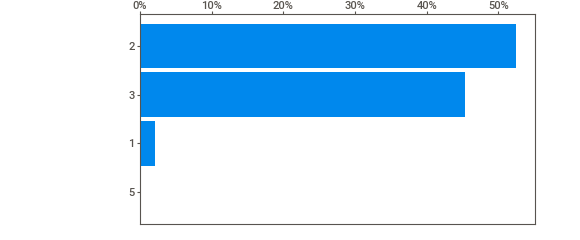
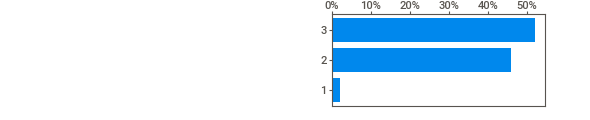
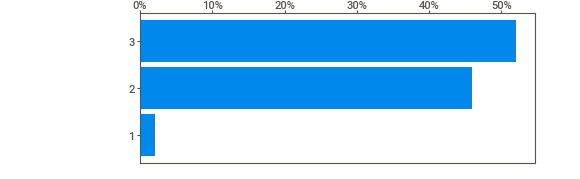
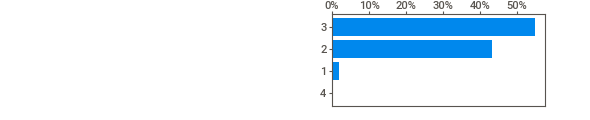
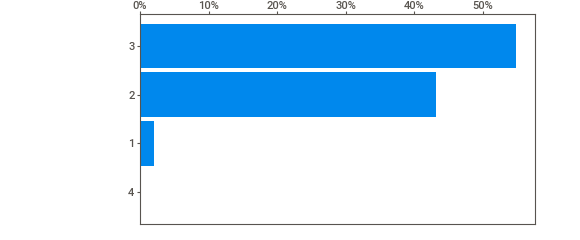
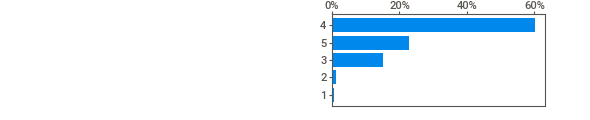
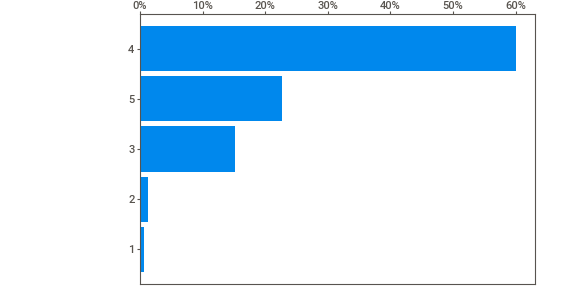
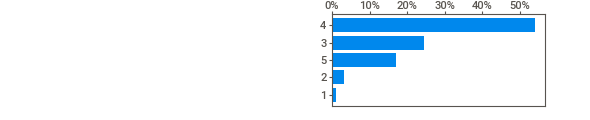
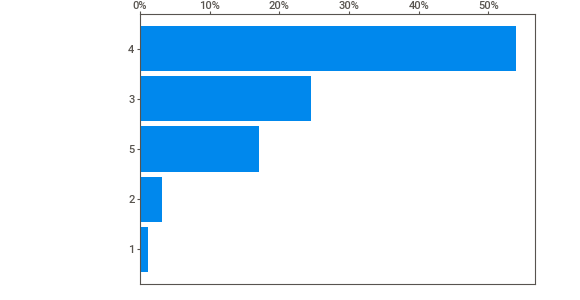
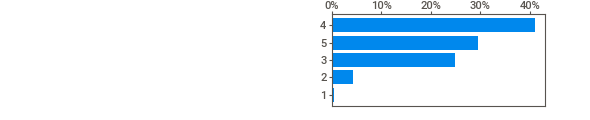
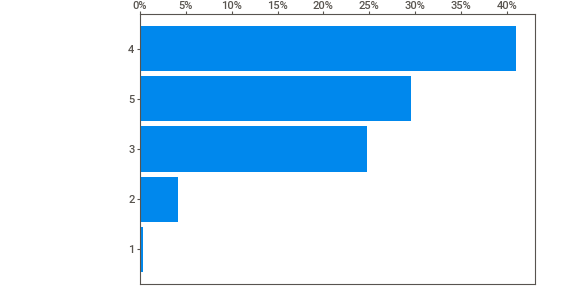
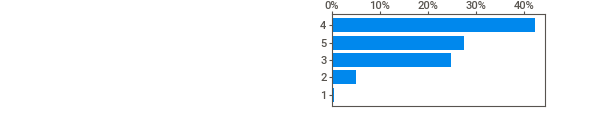
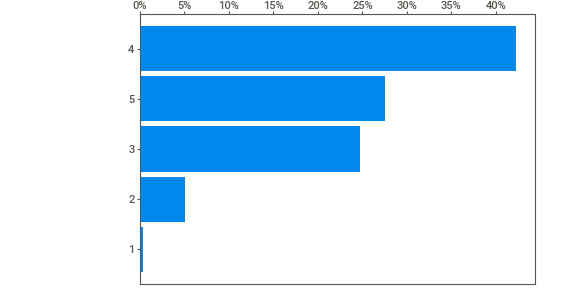
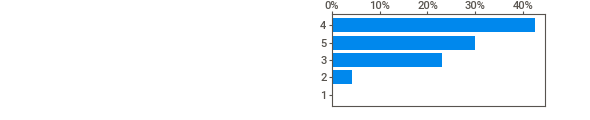
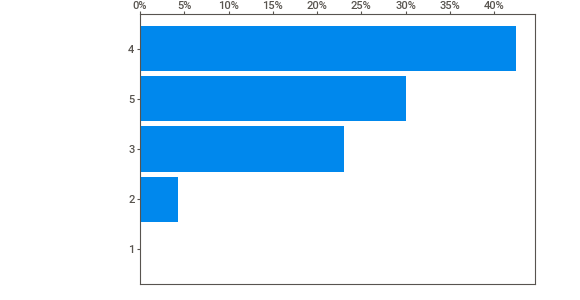
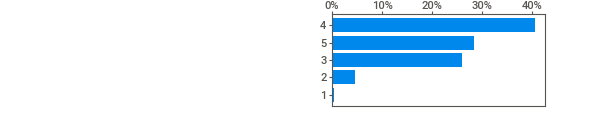
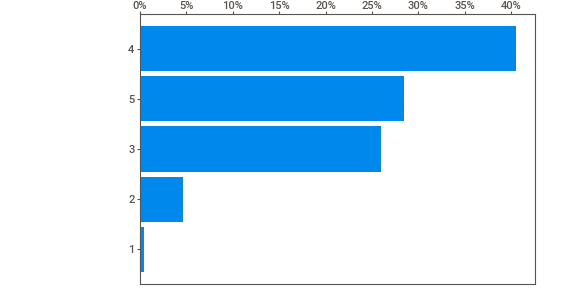
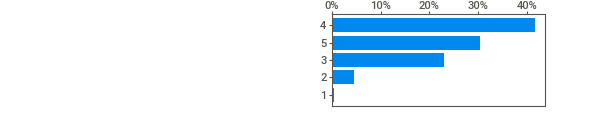
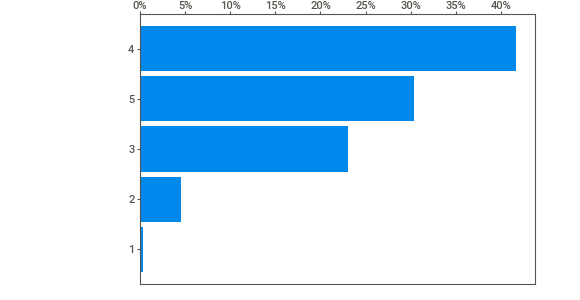
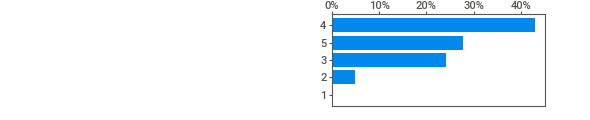
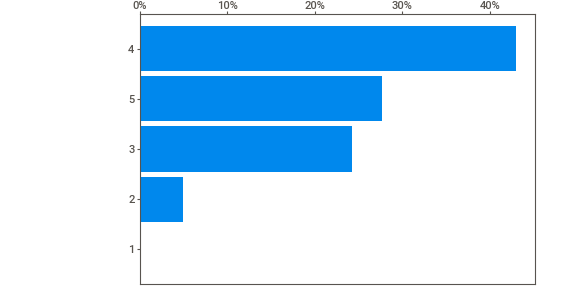
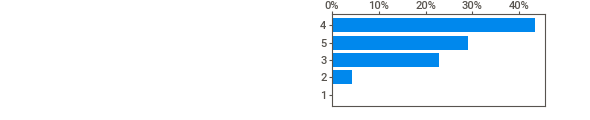
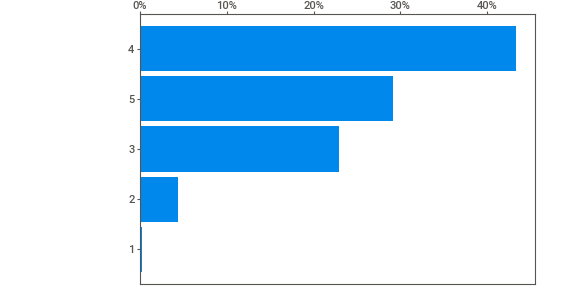
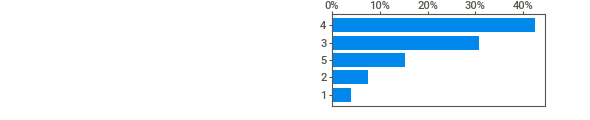
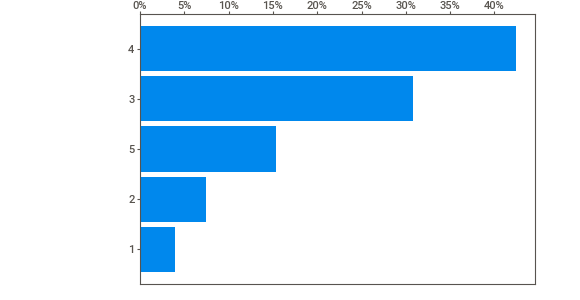
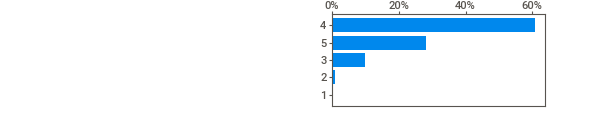
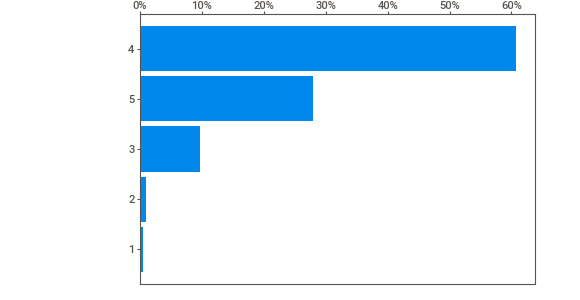
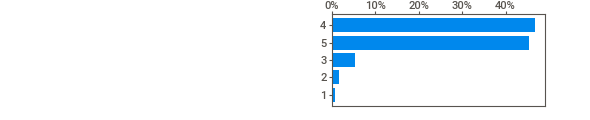
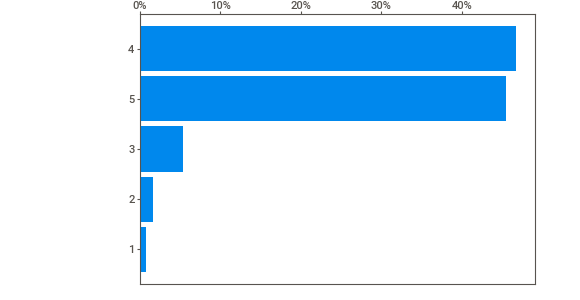
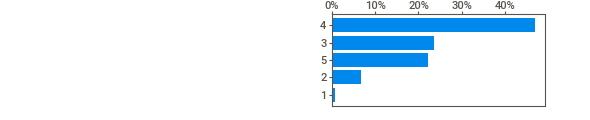
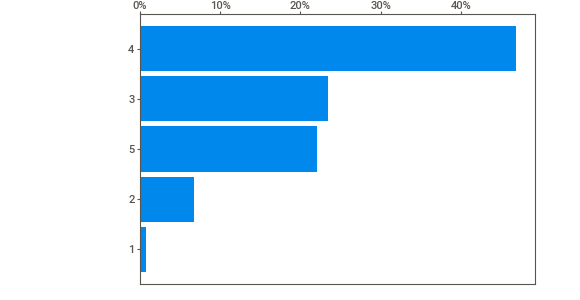
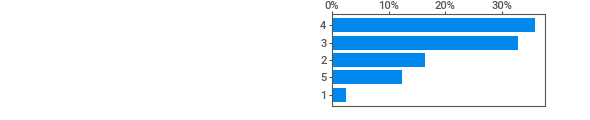
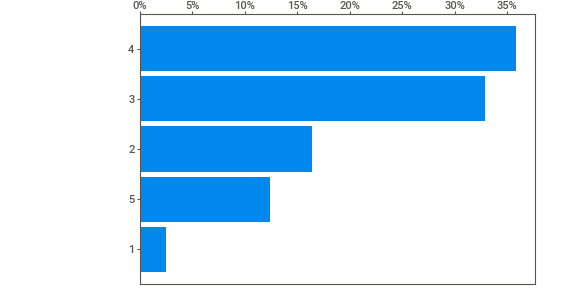
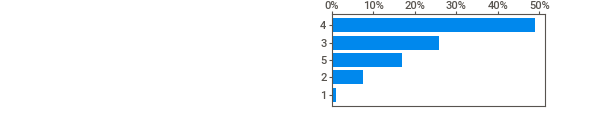
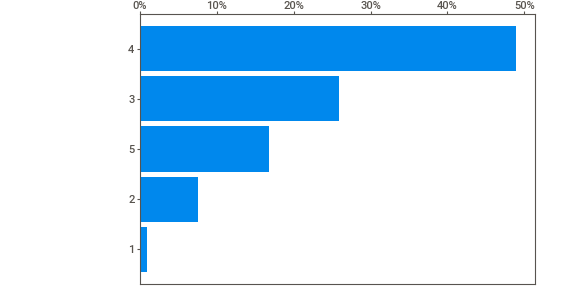
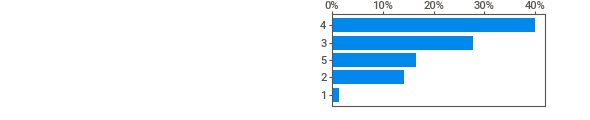
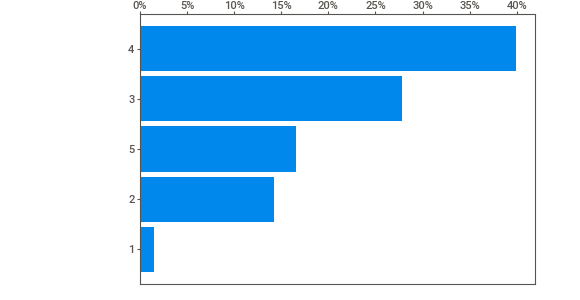
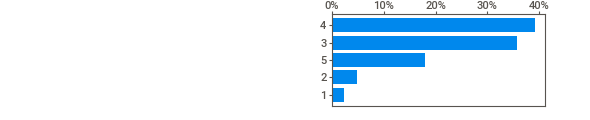
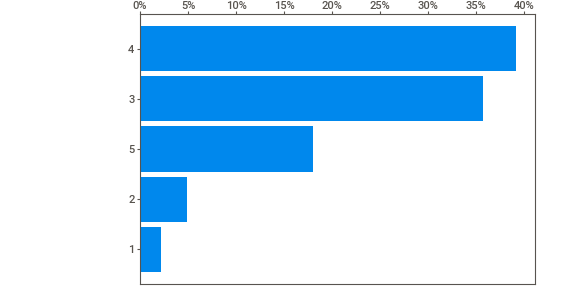
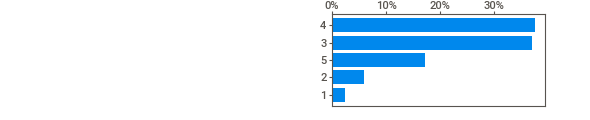
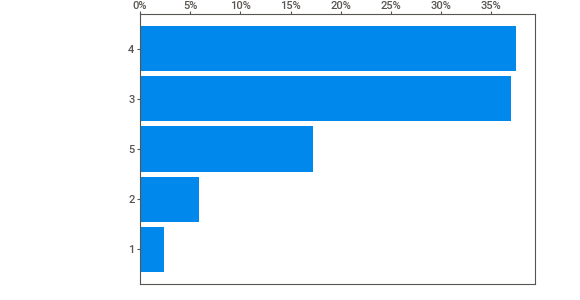
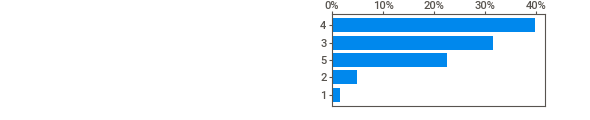
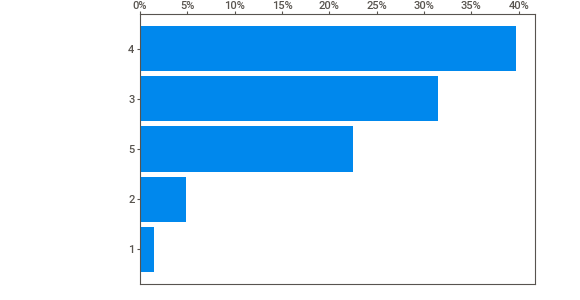
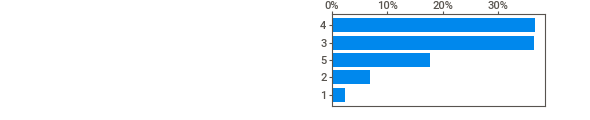
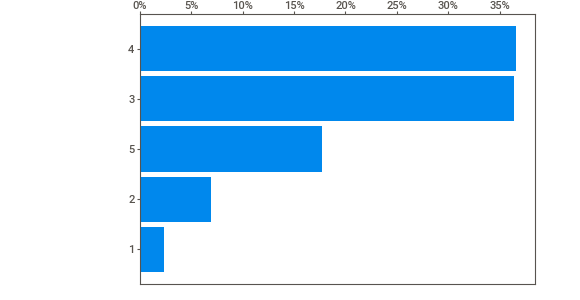
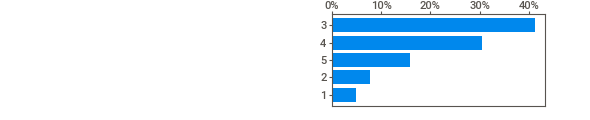
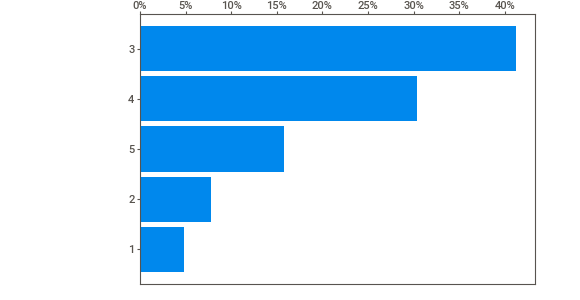
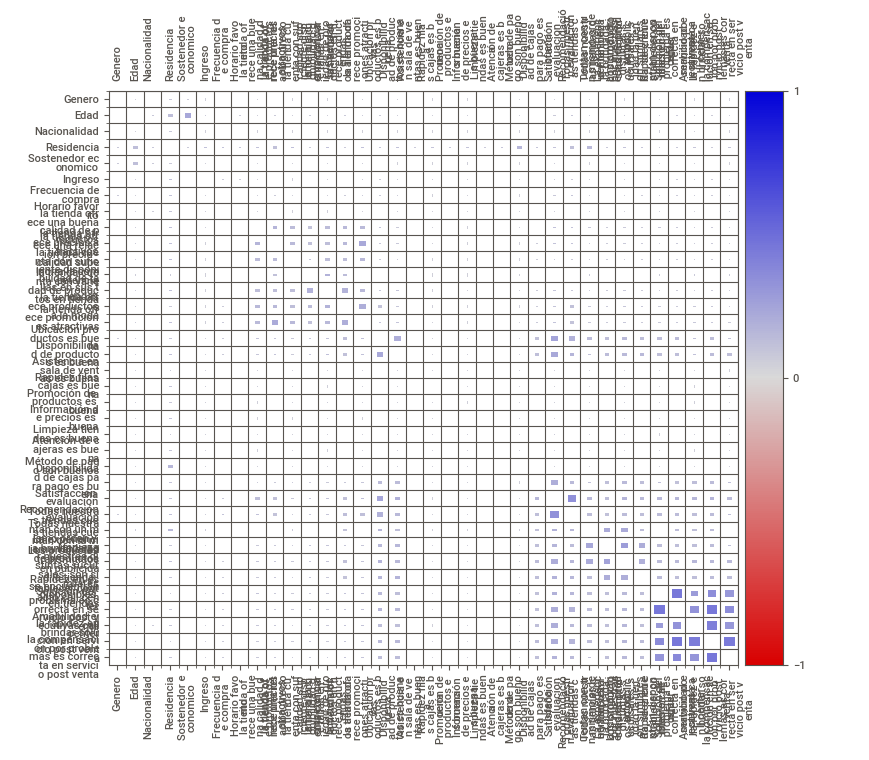
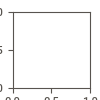

In [9]:
#Vista general de la data
import sweetviz as sw
my_report = sw.analyze(data)
my_report.show_notebook()

#Correlacion de la data y modelo

In [85]:
from google.colab import widgets
from IPython.display import display
X_col=list(set(data.columns.tolist())-{'Satisfacción evaluacion','Recomendación evaluacion'})
Y_col=['Satisfacción evaluacion','Recomendación evaluacion']
edades=data.Edad.drop_duplicates().tolist()+['todas']
tb = widgets.TabBar(edades,location='start')
di={}
for i,edad in enumerate(edades):
  if edad=='todas':
    data_corr=data
  else:
    data_corr = data.loc[data.Edad==edad]
  data_corr=data_corr.corr('spearman')[Y_col].loc[X_col]
  di1={}
  for col in Y_col:
    a=data_corr[col]
    b=a-a.min()
    c=b/b.sum()
    d=c.sort_values(ascending=False)
    d.loc[d.cumsum()<=.8].index.tolist()
    di1[col]=d.loc[d.cumsum()<=.8].index.tolist()
  di[edad]=di1
  with tb.output_to(i):
    display(DataTable(data_corr))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.309239,0.235597
Atención de cajeras es buena,-0.016916,-0.070348
Ingreso,-0.082372,-0.075450
Horario favorito,-0.035712,0.005871
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.206461,0.209315
Todas nuestras tiendas cuentan con la misma variedad de productos,0.369863,0.256946
la tienda cuenta con variedad de productos en tiendas,0.181873,0.139461
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.469505,0.344600
la tienda ofrece una relación precio - calidad superior a la competencia,0.103395,0.069453
Disponibilidad de cajas para pago es buena,0.449479,0.343436


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.101694,0.131256
Atención de cajeras es buena,-0.222802,-0.153722
Ingreso,-0.194794,-0.193890
Horario favorito,0.069502,-0.005063
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.243051,0.436271
Todas nuestras tiendas cuentan con la misma variedad de productos,0.551304,0.404311
la tienda cuenta con variedad de productos en tiendas,-0.013533,0.215097
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.596949,0.526120
la tienda ofrece una relación precio - calidad superior a la competencia,0.157855,0.191985
Disponibilidad de cajas para pago es buena,0.475918,0.251979


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.184857,0.258554
Atención de cajeras es buena,0.031351,0.039095
Ingreso,-0.168305,-0.235169
Horario favorito,-0.032467,-0.101529
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.167323,0.178991
Todas nuestras tiendas cuentan con la misma variedad de productos,0.451725,0.421405
la tienda cuenta con variedad de productos en tiendas,0.272511,0.282899
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.418045,0.424074
la tienda ofrece una relación precio - calidad superior a la competencia,0.098113,0.094435
Disponibilidad de cajas para pago es buena,0.488973,0.397856


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.224101,0.234561
Atención de cajeras es buena,0.015651,0.034087
Ingreso,-0.172890,-0.108625
Horario favorito,-0.016227,-0.052559
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.247063,0.248656
Todas nuestras tiendas cuentan con la misma variedad de productos,0.394703,0.355686
la tienda cuenta con variedad de productos en tiendas,0.286325,0.221213
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.421668,0.437608
la tienda ofrece una relación precio - calidad superior a la competencia,0.134412,0.123565
Disponibilidad de cajas para pago es buena,0.435358,0.353680


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.071168,0.150763
Atención de cajeras es buena,0.074616,0.078456
Ingreso,-0.097522,-0.114017
Horario favorito,-0.029388,0.015536
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.144151,0.177777
Todas nuestras tiendas cuentan con la misma variedad de productos,0.380905,0.316093
la tienda cuenta con variedad de productos en tiendas,0.136818,0.115562
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.409840,0.397099
la tienda ofrece una relación precio - calidad superior a la competencia,0.052096,0.021459
Disponibilidad de cajas para pago es buena,0.494129,0.413986


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.298823,0.199337
Atención de cajeras es buena,-0.021882,-0.094277
Ingreso,0.022610,0.066107
Horario favorito,-0.013219,-0.026614
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.194506,0.192829
Todas nuestras tiendas cuentan con la misma variedad de productos,0.355007,0.258906
la tienda cuenta con variedad de productos en tiendas,0.275554,0.258450
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.481956,0.288932
la tienda ofrece una relación precio - calidad superior a la competencia,0.220375,0.221773
Disponibilidad de cajas para pago es buena,0.465064,0.313057


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.395228,0.144707
Atención de cajeras es buena,0.029633,0.266236
Ingreso,0.090887,0.127896
Horario favorito,0.048276,0.046831
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.159916,-0.080508
Todas nuestras tiendas cuentan con la misma variedad de productos,0.300771,0.172390
la tienda cuenta con variedad de productos en tiendas,0.424858,0.194444
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.537855,0.381687
la tienda ofrece una relación precio - calidad superior a la competencia,0.154494,-0.033333
Disponibilidad de cajas para pago es buena,0.555780,0.378407


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Satisfacción evaluacion,Recomendación evaluacion
la tienda ofrece una buena calidad de productos,0.216667,0.226042
Atención de cajeras es buena,0.018674,0.012724
Ingreso,-0.154624,-0.146278
Horario favorito,-0.027667,-0.022423
la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas,0.212381,0.229683
Todas nuestras tiendas cuentan con la misma variedad de productos,0.401541,0.330895
la tienda cuenta con variedad de productos en tiendas,0.216778,0.196239
"Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas",0.450747,0.401596
la tienda ofrece una relación precio - calidad superior a la competencia,0.114606,0.095018
Disponibilidad de cajas para pago es buena,0.476623,0.382229


<IPython.core.display.Javascript object>

In [88]:
from sklearn.linear_model import LogisticRegression
cols=['Satisfacción evaluacion','Recomendación evaluacion']
A=[]
for col in cols:
  for edad in edades:
    y=data[col]
    X=data[di[edad][col]]
    if edad!='todas':
      y=y.loc[data.Edad==edad]
      X=X.loc[data.Edad==edad]
    clf = LogisticRegression(n_jobs=-1,max_iter=1000).fit(X, y)
    A+=[pd.DataFrame({'Columna_y':[col],'Edad':[edad],'valor_regresion':[clf.score(X, y)],'columnas_X':[di[edad][col]]})]
DataTable(pd.concat(A).reset_index(drop=True))

,Columna_y,Edad,valor_regresion,columnas_X
0,Satisfacción evaluacion,2,0.804933,"[Ubicación productos es buena, La experiencia ..."
1,Satisfacción evaluacion,6,0.845070,"[Ubicación productos es buena, Disponibilidad ..."
2,Satisfacción evaluacion,5,0.816406,"[Ubicación productos es buena, Disponibilidad ..."
3,Satisfacción evaluacion,3,0.793367,"[Ubicación productos es buena, la rapidez en b..."
4,Satisfacción evaluacion,4,0.755299,"[Disponibilidad de productos es buena, Disponi..."
5,Satisfacción evaluacion,1,0.827869,[Solución del problema es correcta en servicio...
6,Satisfacción evaluacion,7,1.000000,"[Ubicación productos es buena, la rapidez en b..."
7,Satisfacción evaluacion,todas,0.773297,"[Ubicación productos es buena, Disponibilidad ..."
8,Recomendación evaluacion,2,0.744395,"[Ubicación productos es buena, Solución del pr..."
9,Recomendación evaluacion,6,0.901408,"[Disponibilidad de productos es buena, Ubicaci..."


Por lo que se puede ver en la tabla anterior, que para algunas edades la regresion logistica es mejor que para otras, inclusive, una de las peores regresion es para toda la data (representada por la edad _todas_).
Dando el mejor modelo de las variables Satisfacción evaluacion y Recomendación evaluacion, para la edad 7.

In [93]:
lst=[set(di[edad][col]) for edad in edades for col in cols]
lst[0].intersection(*lst)

{'Amabilidad ejecutivas call center',
 'Disponibilidad de cajas para pago es buena',
 'Disponibilidad de productos es buena',
 'Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas',
 'Rapidez en establecer contacto call center',
 'Solución del problema es correcta en servicio post venta',
 'Todas nuestras tiendas cuentan con la misma variedad de productos',
 'Todas nuestras tiendas cuentan con un mismo orden y limpieza',
 'Ubicación productos es buena',
 'la compensación por problemas es correcta en servicio post venta',
 'la rapidez en brindar solución en servicio post venta',
 'la tienda ofrece precios atractivos',
 'la tienda ofrece una buena calidad de productos'}

Por lo que se puede apreciar en la lista anterior, que las indicaciones que se recomendarian para todas las edades serian:

- Amabilidad ejecutivas call center
- Disponibilidad de cajas para pago es buena
- Disponibilidad de productos es buena
- Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas
- Rapidez en establecer contacto call center
- Solución del problema es correcta en servicio post venta
- Todas nuestras tiendas cuentan con la misma variedad de productos
- Todas nuestras tiendas cuentan con un mismo orden y limpieza
- Ubicación productos es buena
- la compensación por problemas es correcta en servicio post venta
- la rapidez en brindar solución en servicio post venta
- la tienda ofrece precios atractivos
- la tienda ofrece una buena calidad de productos